In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:\Users\SUBRAT\Desktop\PANDAS\insurance.csv")

# Basic info
print(df.info())
print(df.describe())
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

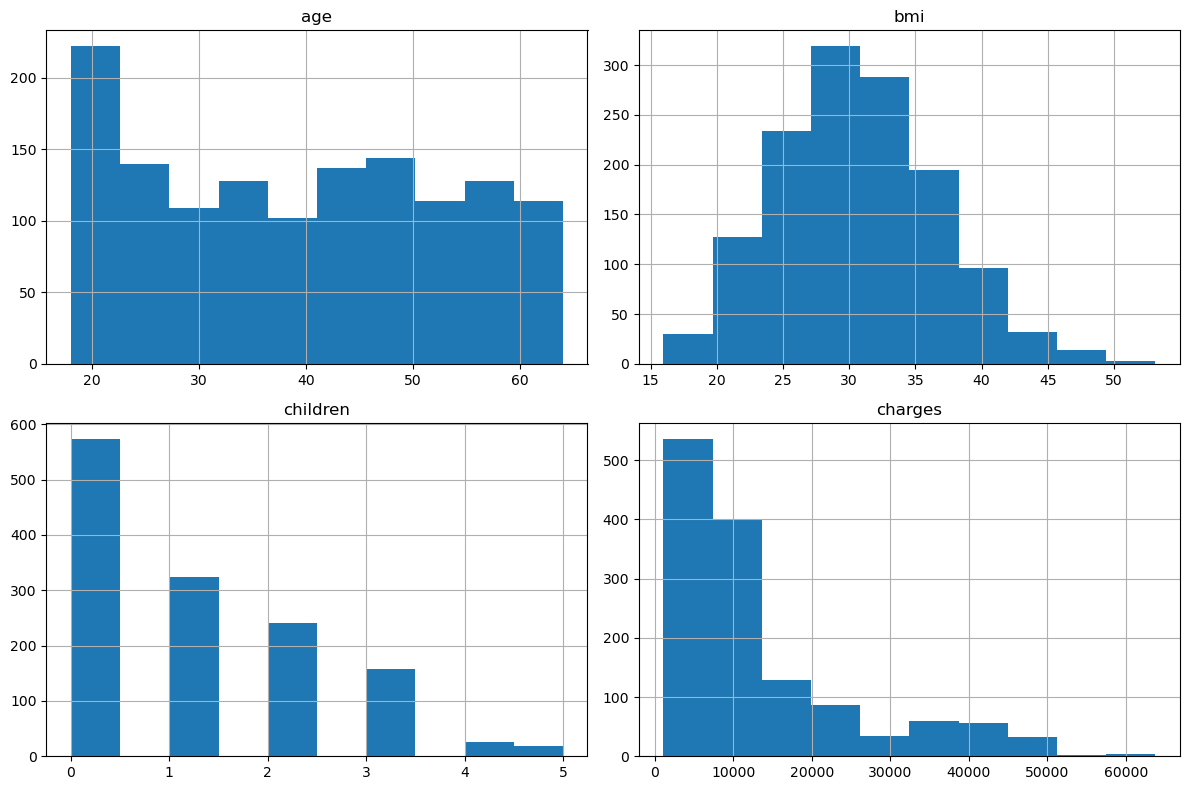

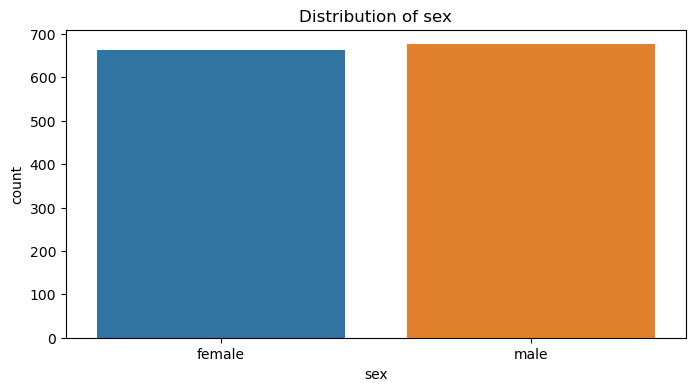

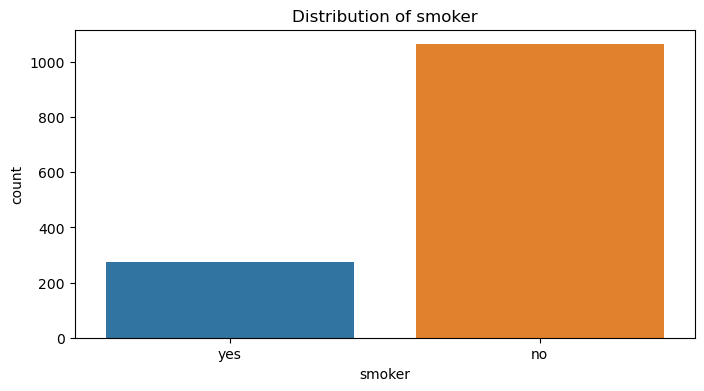

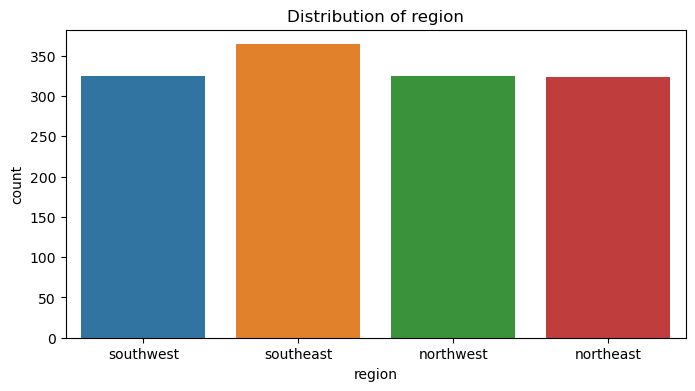

In [19]:
# Numerical features
num_cols = ['age', 'bmi', 'children', 'charges']
df[num_cols].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Categorical features
cat_cols = ['sex', 'smoker', 'region']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

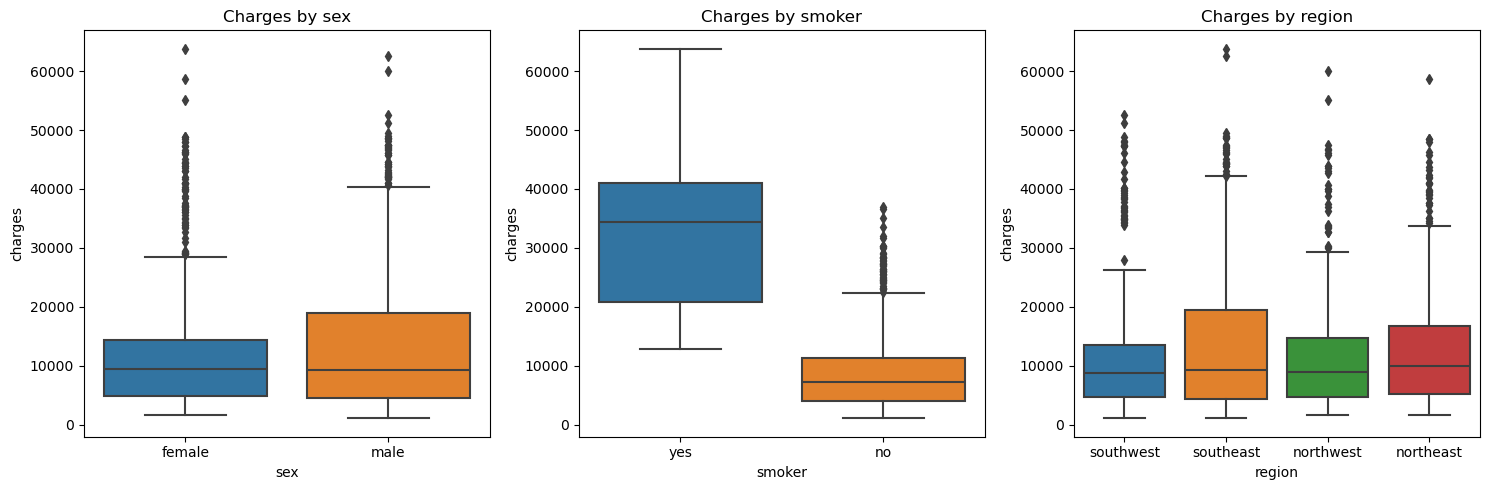

Smoker vs Non-smoker charges t-test: t=46.66, p=0.0000


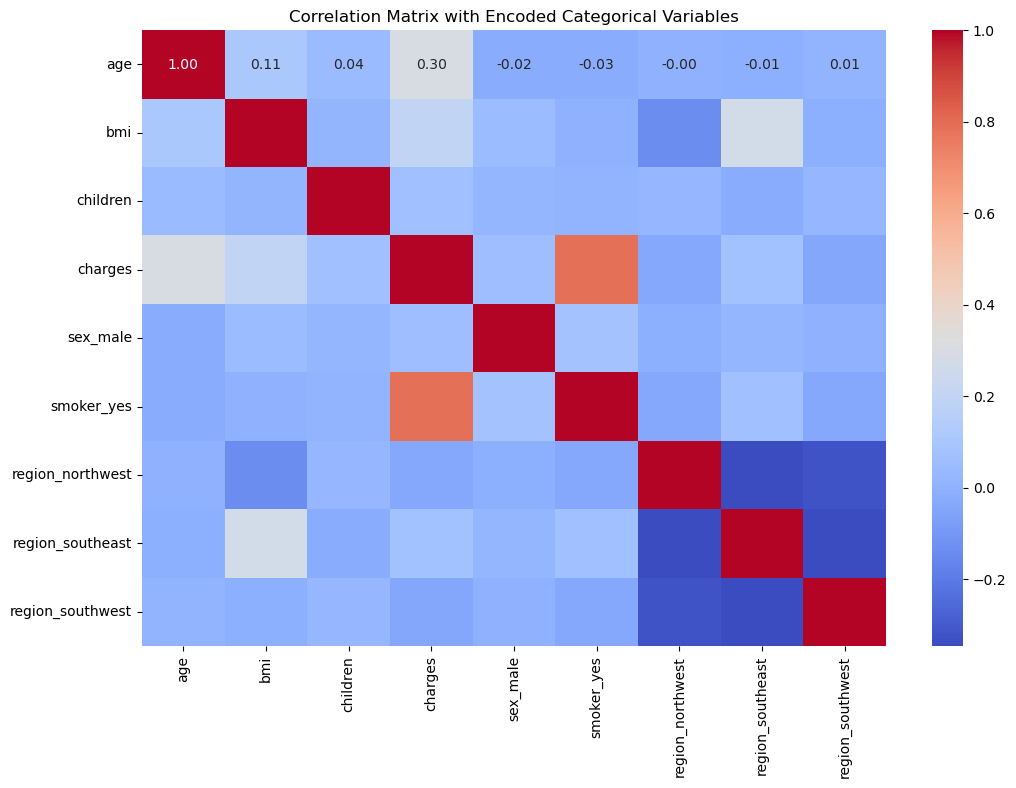

C:\Users\SUBRAT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SUBRAT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SUBRAT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


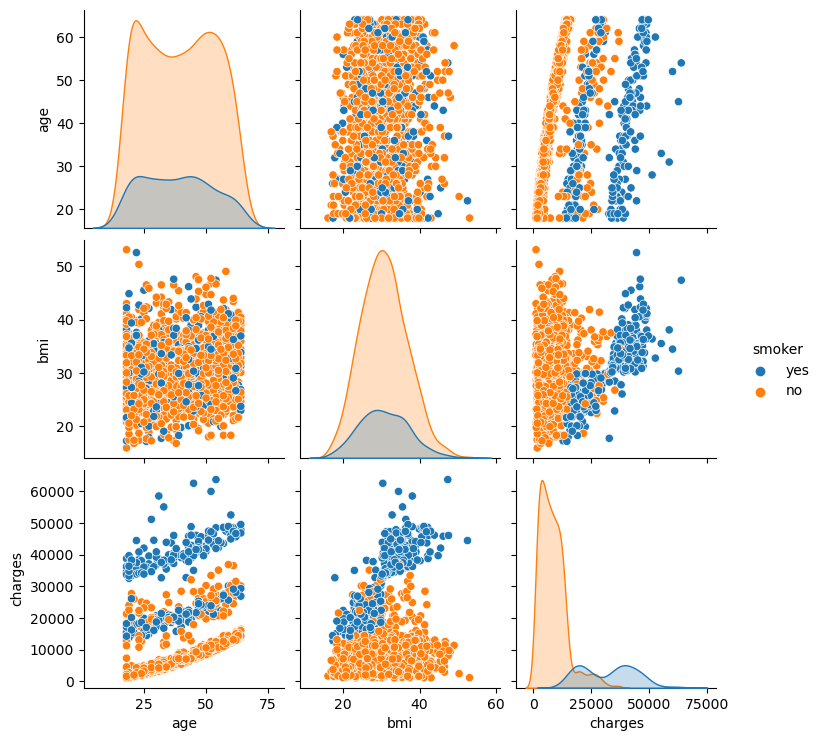

In [20]:
# For categorical vs numerical (charges) analysis:
cat_cols = ['sex', 'smoker', 'region']

# 1. Boxplots (correct way)
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=col, y='charges')
    plt.title(f'Charges by {col}')
plt.tight_layout()
plt.show()

# 2. Statistical tests (example for smoker vs charges)
from scipy.stats import ttest_ind
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']
t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges)
print(f"Smoker vs Non-smoker charges t-test: t={t_stat:.2f}, p={p_value:.4f}")

# 3. Correlation matrix with encoded categoricals
# First encode categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Encoded Categorical Variables')
plt.show()

# 4. Pairplots with hue for categorical variables
sns.pairplot(df, vars=['age', 'bmi', 'charges'], hue='smoker')
plt.show()

In [21]:
# Create new features
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 40, 50, 60, 65], 
                        labels=['18-29', '30-39', '40-49', '50-59', '60-64'])

df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], 
                           labels=['underweight', 'normal', 'overweight', 'obese'])

df['has_children'] = df['children'].apply(lambda x: 1 if x > 0 else 0)

# Create interaction features
df['smoker_age'] = df['smoker'].map({'yes': 1, 'no': 0}) * df['age']
df['smoker_bmi'] = df['smoker'].map({'yes': 1, 'no': 0}) * df['bmi']

# Log transform charges (to handle skewness)
df['log_charges'] = np.log1p(df['charges'])

# Check new features
print(df[['age_group', 'bmi_category', 'has_children', 'smoker_age', 'smoker_bmi']].head())

  age_group bmi_category  has_children  smoker_age  smoker_bmi
0     18-29   overweight             0          19        27.9
1     18-29        obese             1           0         0.0
2     18-29        obese             1           0         0.0
3     30-39       normal             0           0         0.0
4     30-39   overweight             0           0         0.0


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features
X = df.drop(['charges', 'log_charges'], axis=1)
y = df['log_charges']  # Using log-transformed charges as target

# Define preprocessing
num_features = ['age', 'bmi', 'children', 'smoker_age', 'smoker_bmi']
cat_features = ['sex', 'smoker', 'region', 'age_group', 'bmi_category', 'has_children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ])



# Random Forest

R² Score: 0.8522
RMSE: 0.36
MAE: 0.1944
MAPE: 0.0216


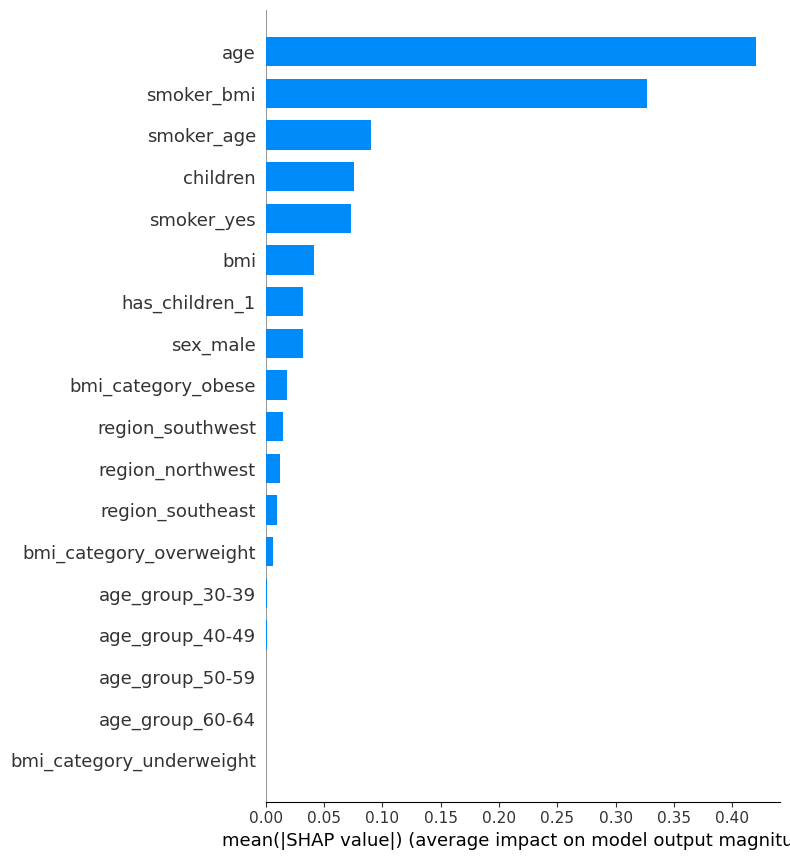

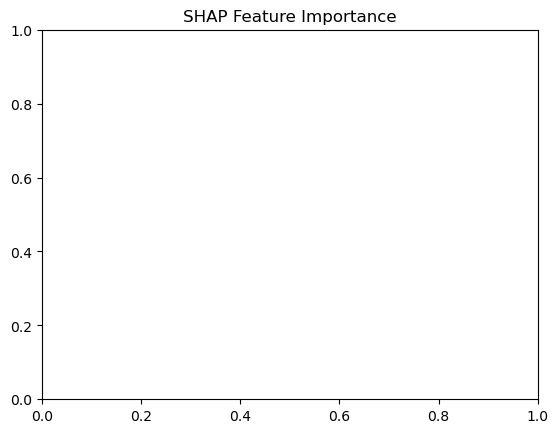

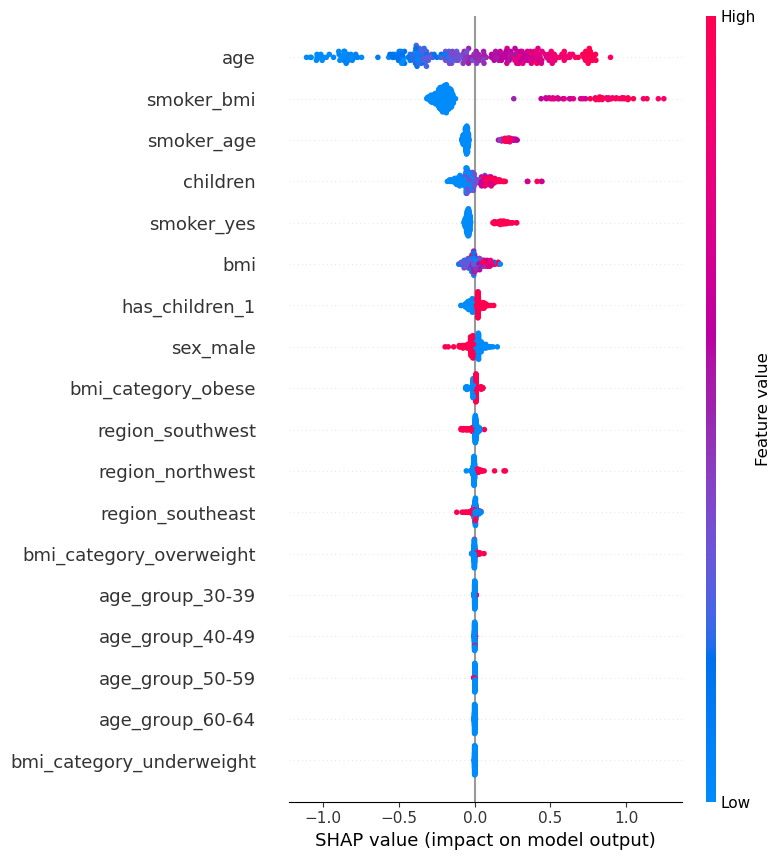

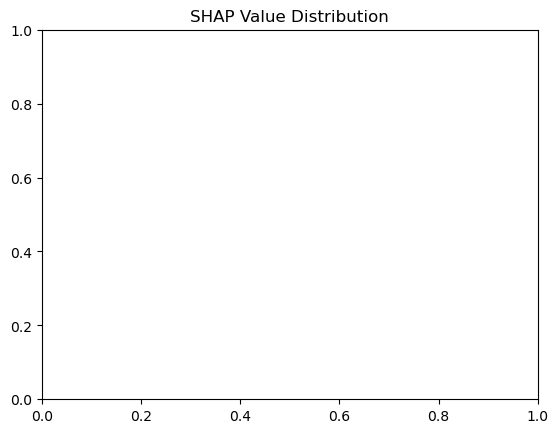

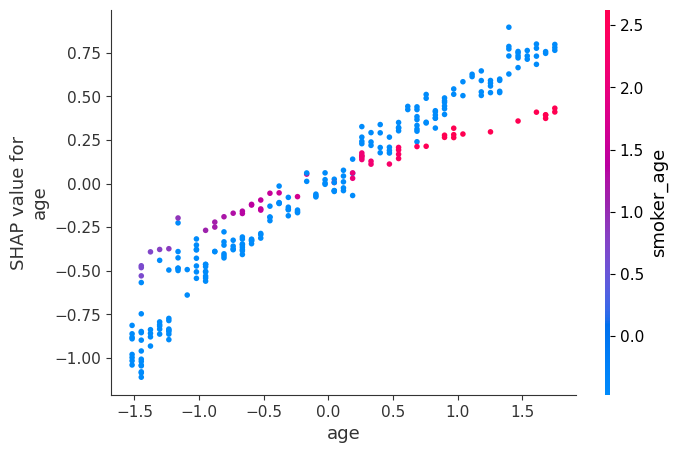

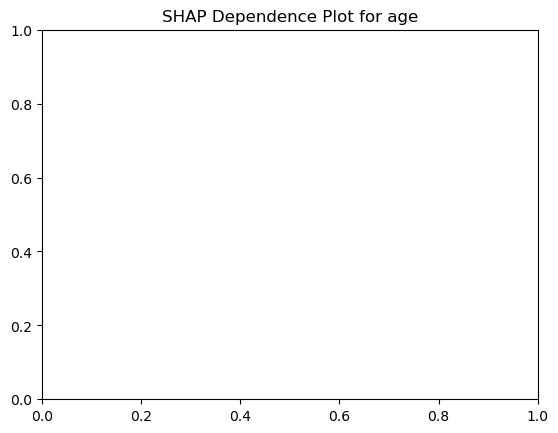

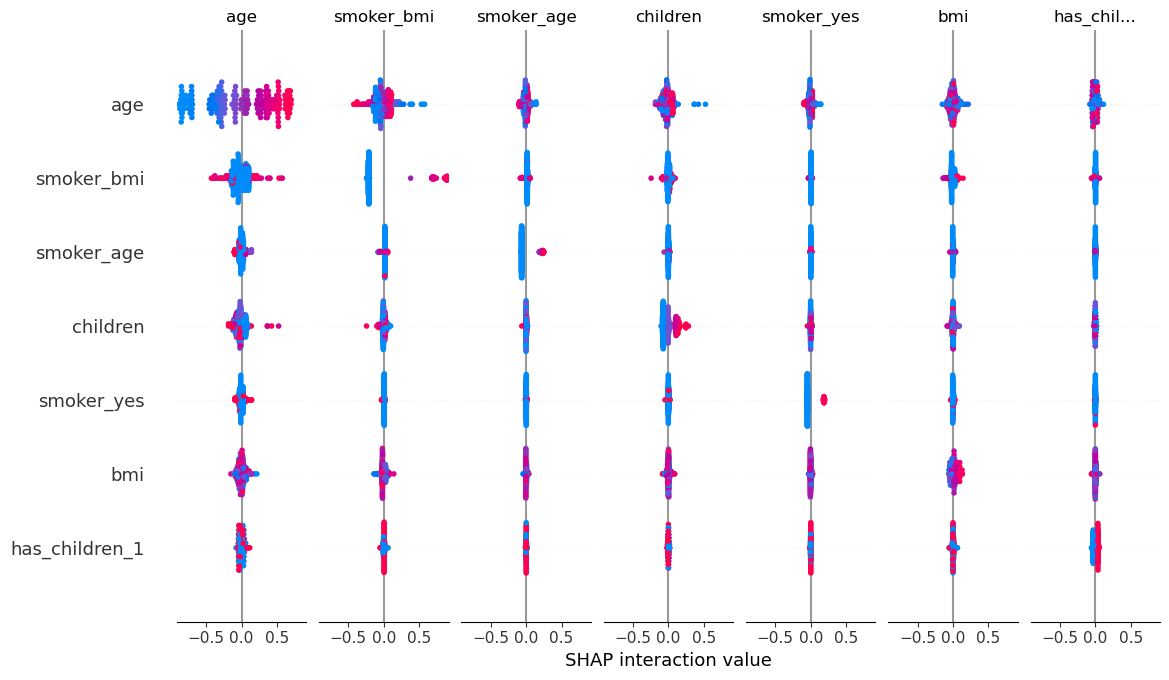


Explanation for instance 10:
Actual log_charges: 9.81
Predicted log_charges: 9.90
Intercept 9.187718010588558
Prediction_local [9.68078958]
Right: 9.895886614498247


<Figure size 800x400 with 0 Axes>

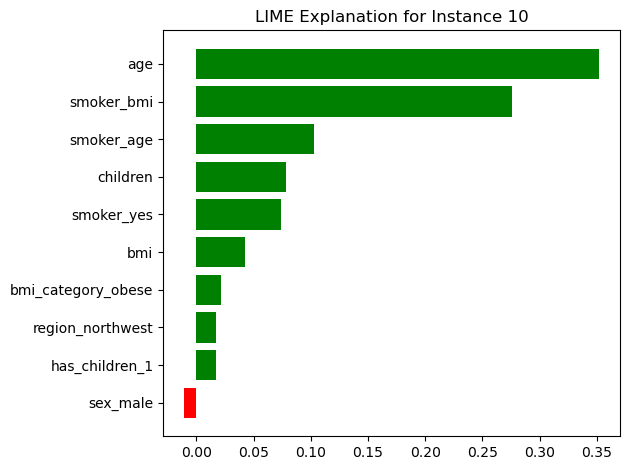


Explanation for instance 50:
Actual log_charges: 9.54
Predicted log_charges: 9.55
Intercept 9.197811810652793
Prediction_local [9.63973861]
Right: 9.553921032380124


<Figure size 800x400 with 0 Axes>

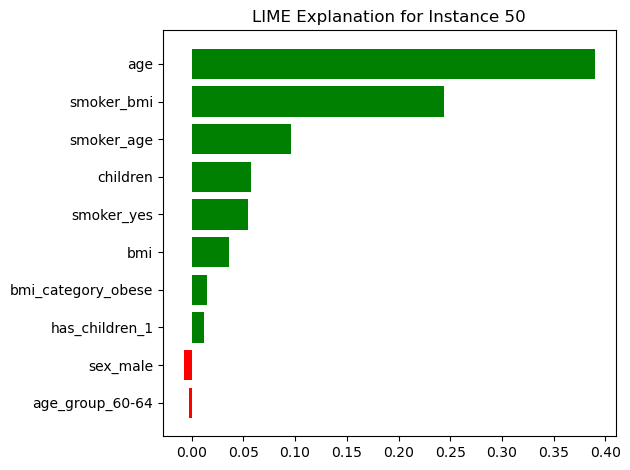


Explanation for instance 100:
Actual log_charges: 8.42
Predicted log_charges: 8.47
Intercept 9.200198383215252
Prediction_local [8.78151853]
Right: 8.471508082984265


<Figure size 800x400 with 0 Axes>

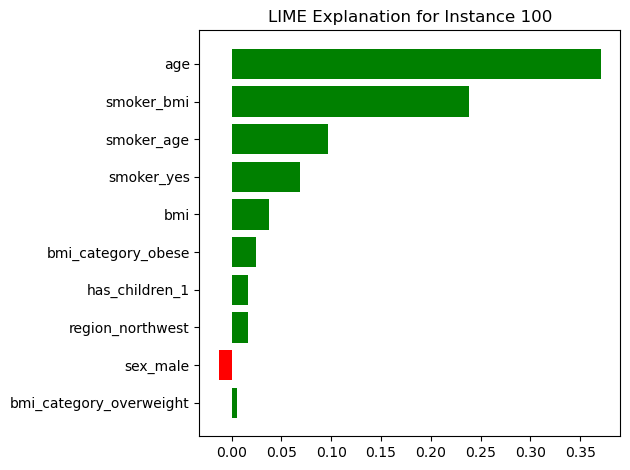

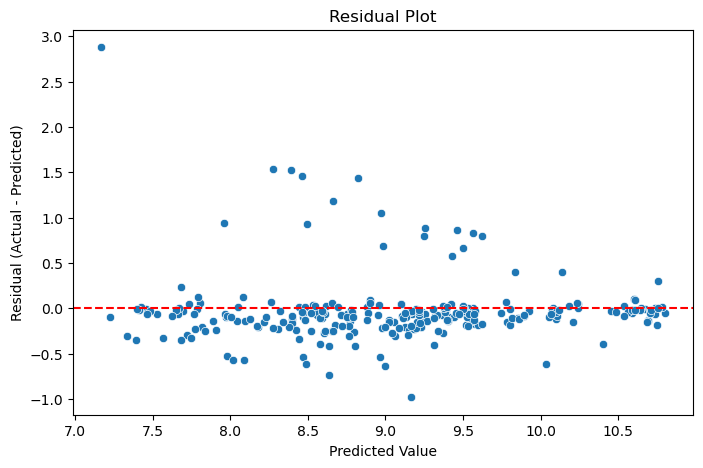

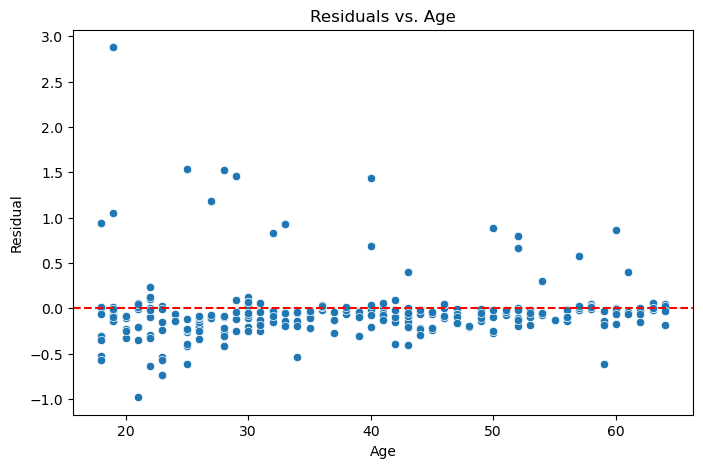

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
import shap
import lime.lime_tabular

# -------------------------------
# Load Data
# -------------------------------
# Assuming df is already loaded, e.g.,
# df = pd.read_csv("insurance.csv")

# -------------------------------
# Feature Engineering
# -------------------------------
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 40, 50, 60, 65], 
                        labels=['18-29', '30-39', '40-49', '50-59', '60-64'])

df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], 
                           labels=['underweight', 'normal', 'overweight', 'obese'])

df['has_children'] = df['children'].apply(lambda x: 1 if x > 0 else 0)

df['smoker_age'] = df['smoker'].map({'yes': 1, 'no': 0}) * df['age']
df['smoker_bmi'] = df['smoker'].map({'yes': 1, 'no': 0}) * df['bmi']

df['log_charges'] = np.log1p(df['charges'])

# -------------------------------
# Data Preparation
# -------------------------------
X = df.drop(['charges', 'log_charges'], axis=1)
y = df['log_charges']

num_features = ['age', 'bmi', 'children', 'smoker_age', 'smoker_bmi']
cat_features = ['sex', 'smoker', 'region', 'age_group', 'bmi_category', 'has_children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Remove zero-variance features (important for LIME)
selector = VarianceThreshold(threshold=0.0)
X_train_processed = selector.fit_transform(X_train_processed)
X_test_processed = selector.transform(X_test_processed)

# Get feature names
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([num_features, cat_feature_names])
all_feature_names = all_feature_names[selector.get_support()]  # update after removing variance

# -------------------------------
# Random Forest Model
# -------------------------------
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train_processed, y_train)

y_pred = rf.predict(X_test_processed)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")

# -------------------------------
# SHAP Analysis
# -------------------------------
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_processed)

# SHAP Summary Plots
shap.summary_plot(shap_values, X_test_processed, feature_names=all_feature_names, plot_type="bar")
plt.title("SHAP Feature Importance")
plt.show()

shap.summary_plot(shap_values, X_test_processed, feature_names=all_feature_names)
plt.title("SHAP Value Distribution")
plt.show()

# SHAP Dependence Plot
# Select valid features by index or name
shap.dependence_plot(0, shap_values, X_test_processed, feature_names=all_feature_names)
plt.title(f"SHAP Dependence Plot for {all_feature_names[0]}")
plt.show()

# SHAP Interaction values (optional)
try:
    shap_interaction_values = explainer.shap_interaction_values(X_test_processed)
    shap.summary_plot(shap_interaction_values, X_test_processed, feature_names=all_feature_names)
except:
    print("SHAP interaction values not supported for this model in your version.")

# -------------------------------
# LIME Analysis
# -------------------------------
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_processed,
    feature_names=all_feature_names,
    class_names=['log_charges'],
    mode='regression',
    verbose=True,
    discretize_continuous=False
)

for idx in [10, 50, 100]:
    print(f"\nExplanation for instance {idx}:")
    print(f"Actual log_charges: {y_test.iloc[idx]:.2f}")
    print(f"Predicted log_charges: {y_pred[idx]:.2f}")
    
    exp = explainer_lime.explain_instance(
        X_test_processed[idx], 
        rf.predict, 
        num_features=10
    )
    
    plt.figure(figsize=(8, 4))
    exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Instance {idx}")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Residual Plots
# -------------------------------
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Value")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

# Residual vs Key Feature (e.g., Age)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['age'], y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Age")
plt.ylabel("Residual")
plt.title("Residuals vs. Age")
plt.show()


Starting grid search...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Performance of Best Model:
R² Score: 0.8562
RMSE: 0.36
MAE: 0.1945
MAPE: 0.0218


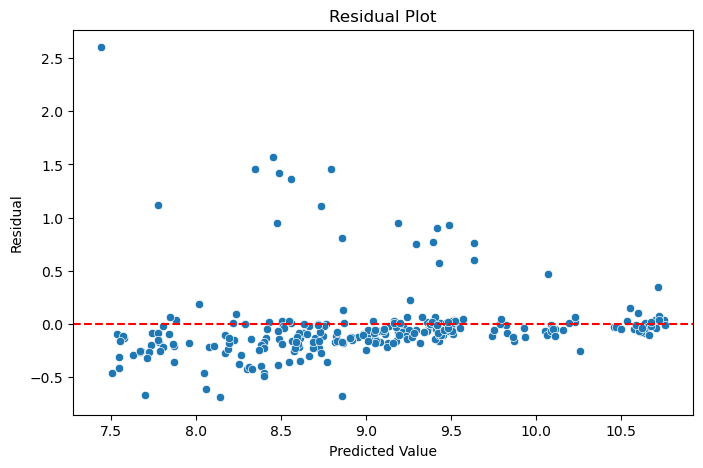

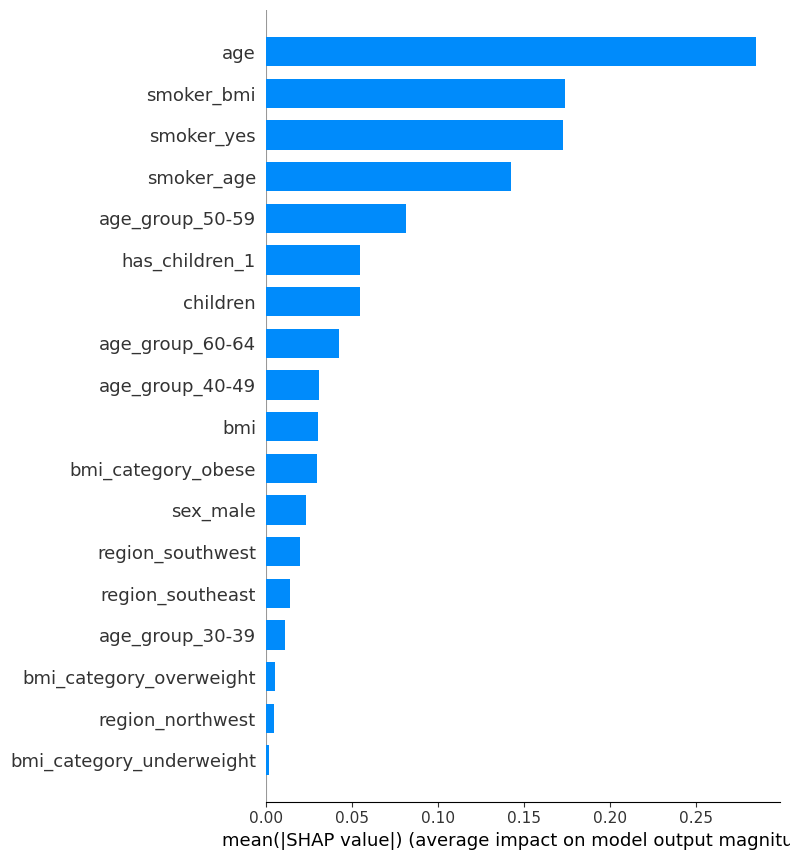

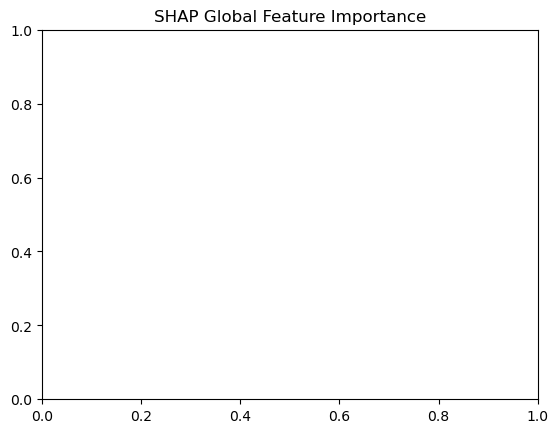

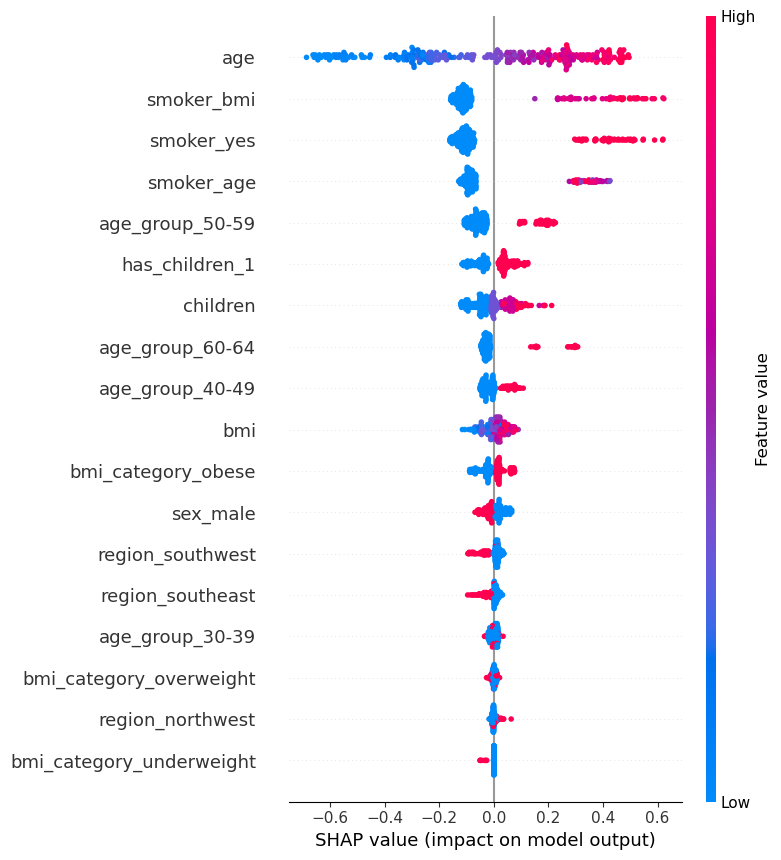

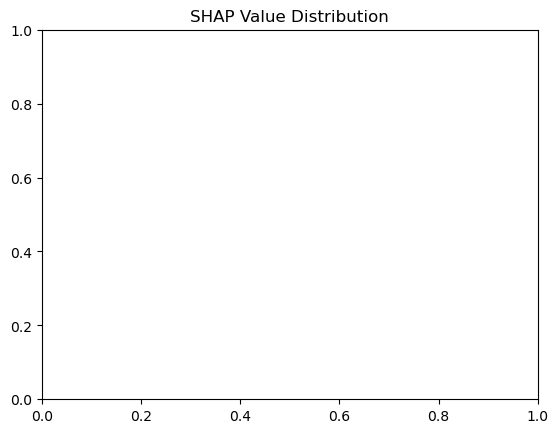

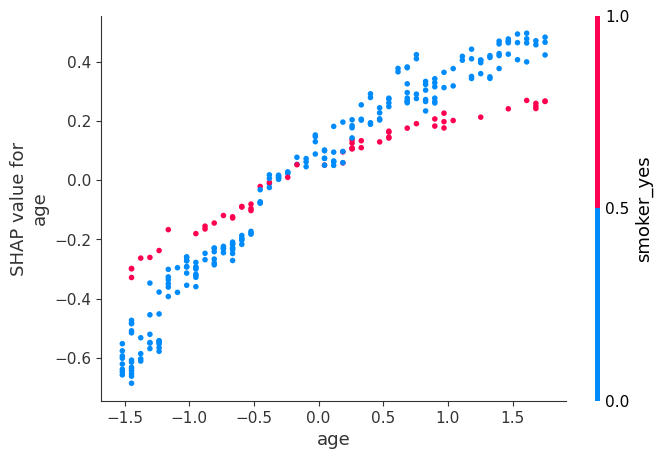

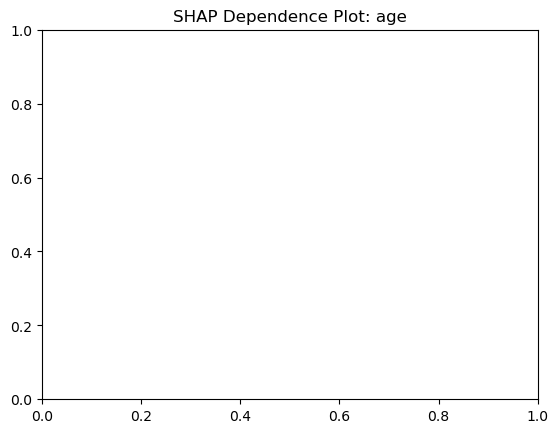


LIME Explanation for Instance 10:
Actual log_charges: 9.81
Predicted log_charges: 9.82


<Figure size 800x400 with 0 Axes>

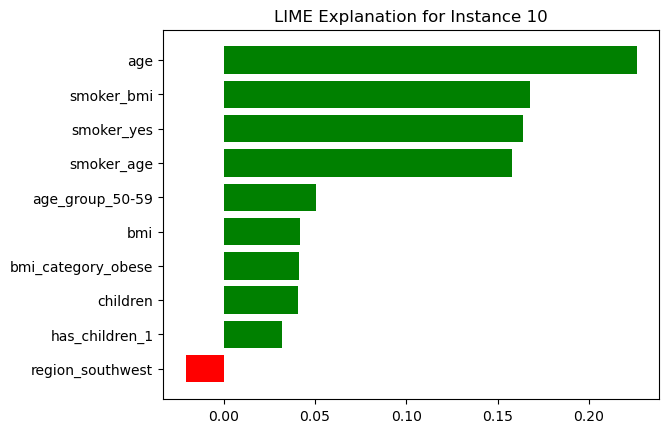


LIME Explanation for Instance 50:
Actual log_charges: 9.54
Predicted log_charges: 9.54


<Figure size 800x400 with 0 Axes>

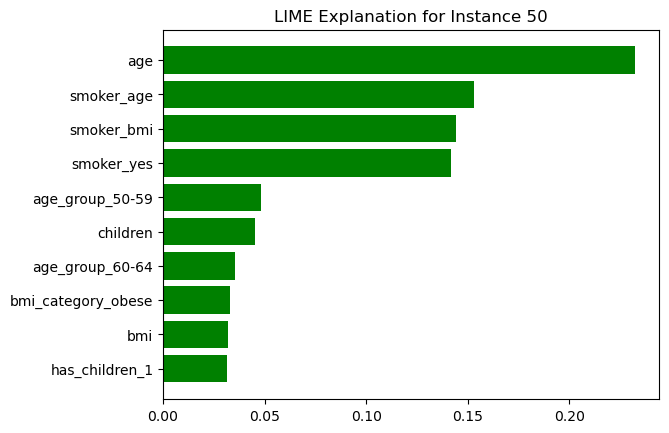


LIME Explanation for Instance 100:
Actual log_charges: 8.42
Predicted log_charges: 8.60


<Figure size 800x400 with 0 Axes>

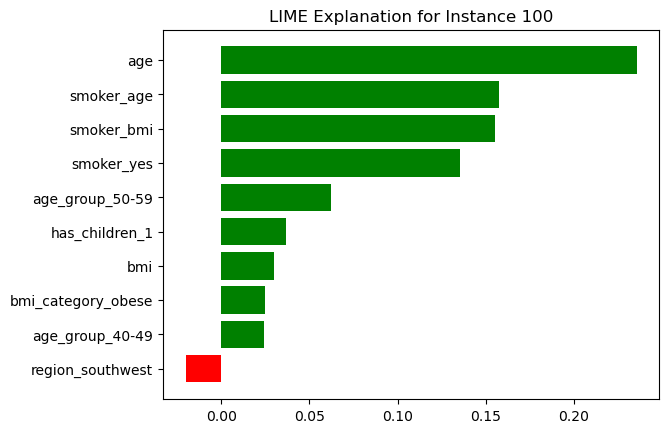

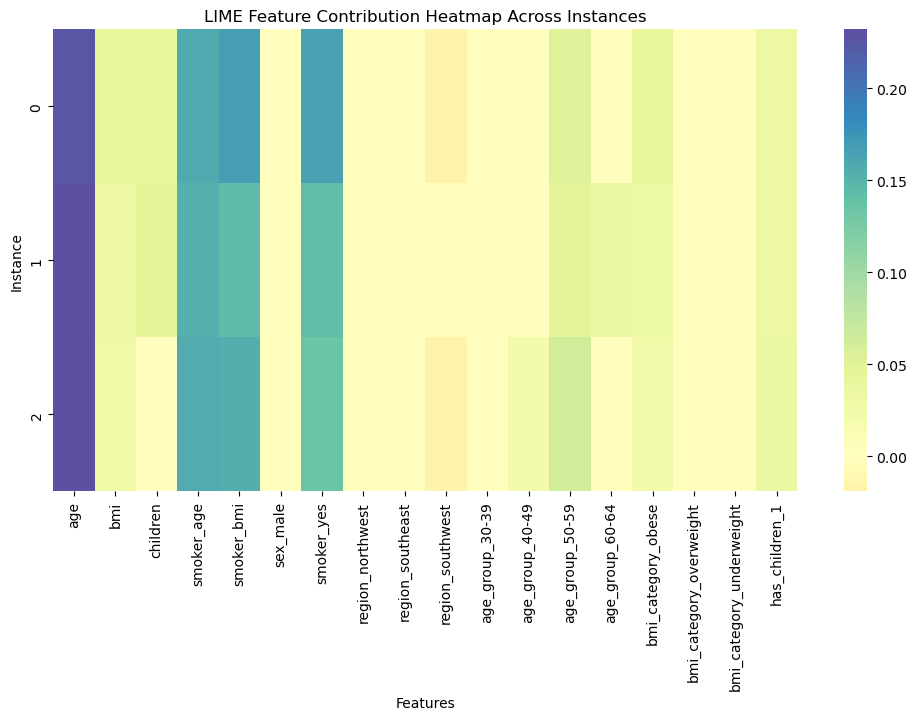

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
import shap
import lime.lime_tabular




# Remove zero-variance features
selector = VarianceThreshold(threshold=0.0)
X_train_processed = selector.fit_transform(X_train_processed)
X_test_processed = selector.transform(X_test_processed)

cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([num_features, cat_feature_names])[selector.get_support()]

# ======================================
# Hyperparameter Tuning with GridSearchCV
# ======================================
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Starting grid search...")
grid_search.fit(X_train_processed, y_train)
print("\nBest parameters found:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# ======================================
# Evaluate Best Model
# ======================================
y_pred = best_rf.predict(X_test_processed)
print("\nPerformance of Best Model:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

# ======================================
# SHAP Analysis
# ======================================
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test_processed)

# Summary Plot
shap.summary_plot(shap_values, X_test_processed, feature_names=all_feature_names, plot_type="bar")
plt.title("SHAP Global Feature Importance")
plt.show()

shap.summary_plot(shap_values, X_test_processed, feature_names=all_feature_names)
plt.title("SHAP Value Distribution")
plt.show()

# Dependence Plot (Top Feature)
top_feature = all_feature_names[0]
shap.dependence_plot(top_feature, shap_values, X_test_processed, feature_names=all_feature_names)
plt.title(f"SHAP Dependence Plot: {top_feature}")
plt.show()

# ======================================
# LIME Analysis
# ======================================
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_processed,
    feature_names=all_feature_names,
    class_names=['log_charges'],
    mode='regression',
    verbose=False,
    discretize_continuous=False
)

# Explain multiple instances
lime_matrix = []
for idx in [10, 50, 100]:
    print(f"\nLIME Explanation for Instance {idx}:")
    print(f"Actual log_charges: {y_test.iloc[idx]:.2f}")
    print(f"Predicted log_charges: {y_pred[idx]:.2f}")
    
    exp = explainer_lime.explain_instance(X_test_processed[idx], best_rf.predict, num_features=10)
    plt.figure(figsize=(8, 4))
    exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Instance {idx}")
    plt.show()
    
    # Collect feature weights for heatmap
    lime_weights = dict(exp.as_list())
    row = [lime_weights.get(f, 0) for f in all_feature_names]
    lime_matrix.append(row)

# ======================================
# LIME Heatmap Across Instances
# ======================================
lime_matrix = np.array(lime_matrix)
plt.figure(figsize=(12, 6))
sns.heatmap(lime_matrix, xticklabels=all_feature_names, cmap='Spectral', center=0,robust=True)
plt.xlabel("Features")
plt.ylabel("Instance")
plt.title("LIME Feature Contribution Heatmap Across Instances")
plt.show()


 # GBM

C:\Users\SUBRAT\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\SUBRAT\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\SUBRAT\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Starting grid search...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Performance:
R²: 0.3655
RMSE: 0.76
MAE: 0.63
MAPE: 0.07


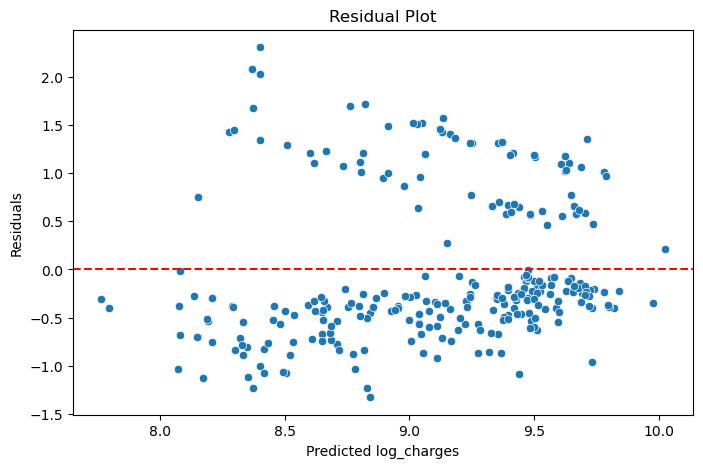

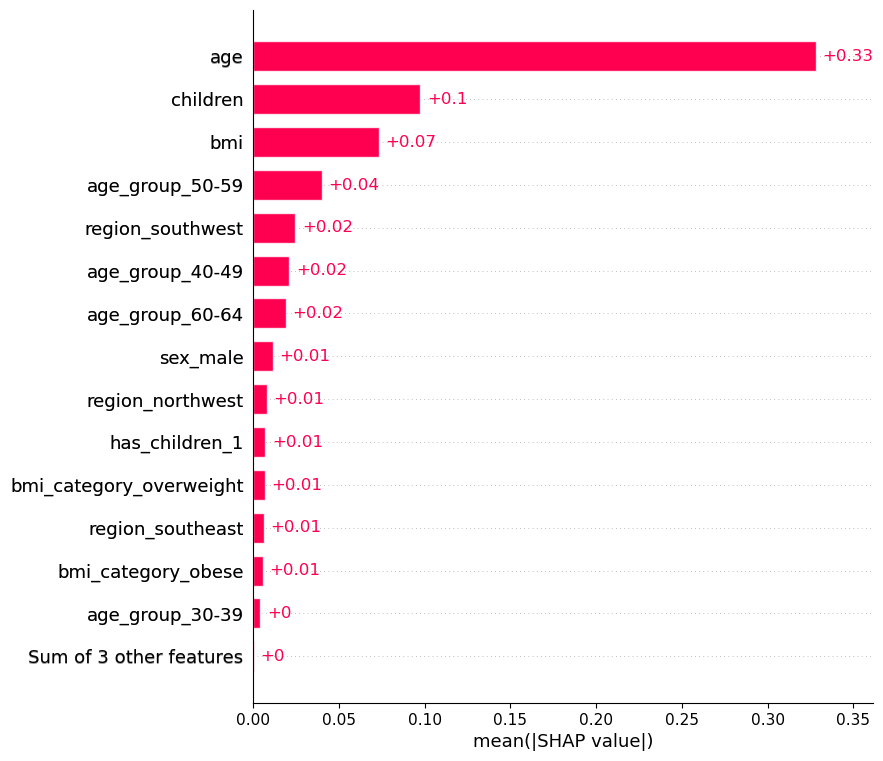

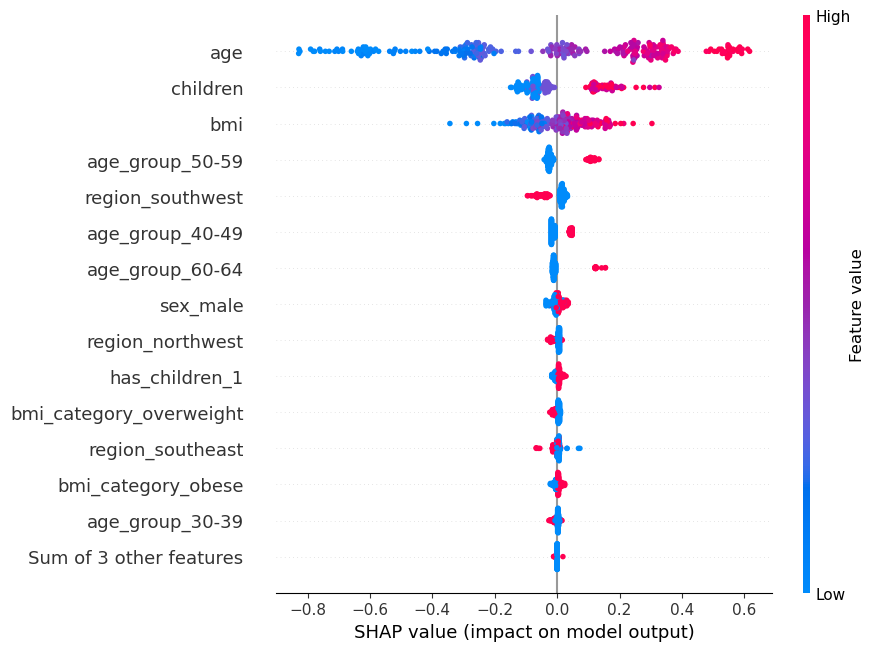

Top feature: age


<Figure size 640x480 with 0 Axes>

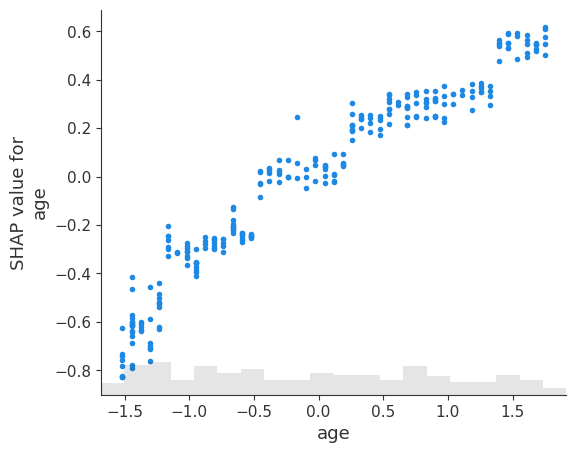

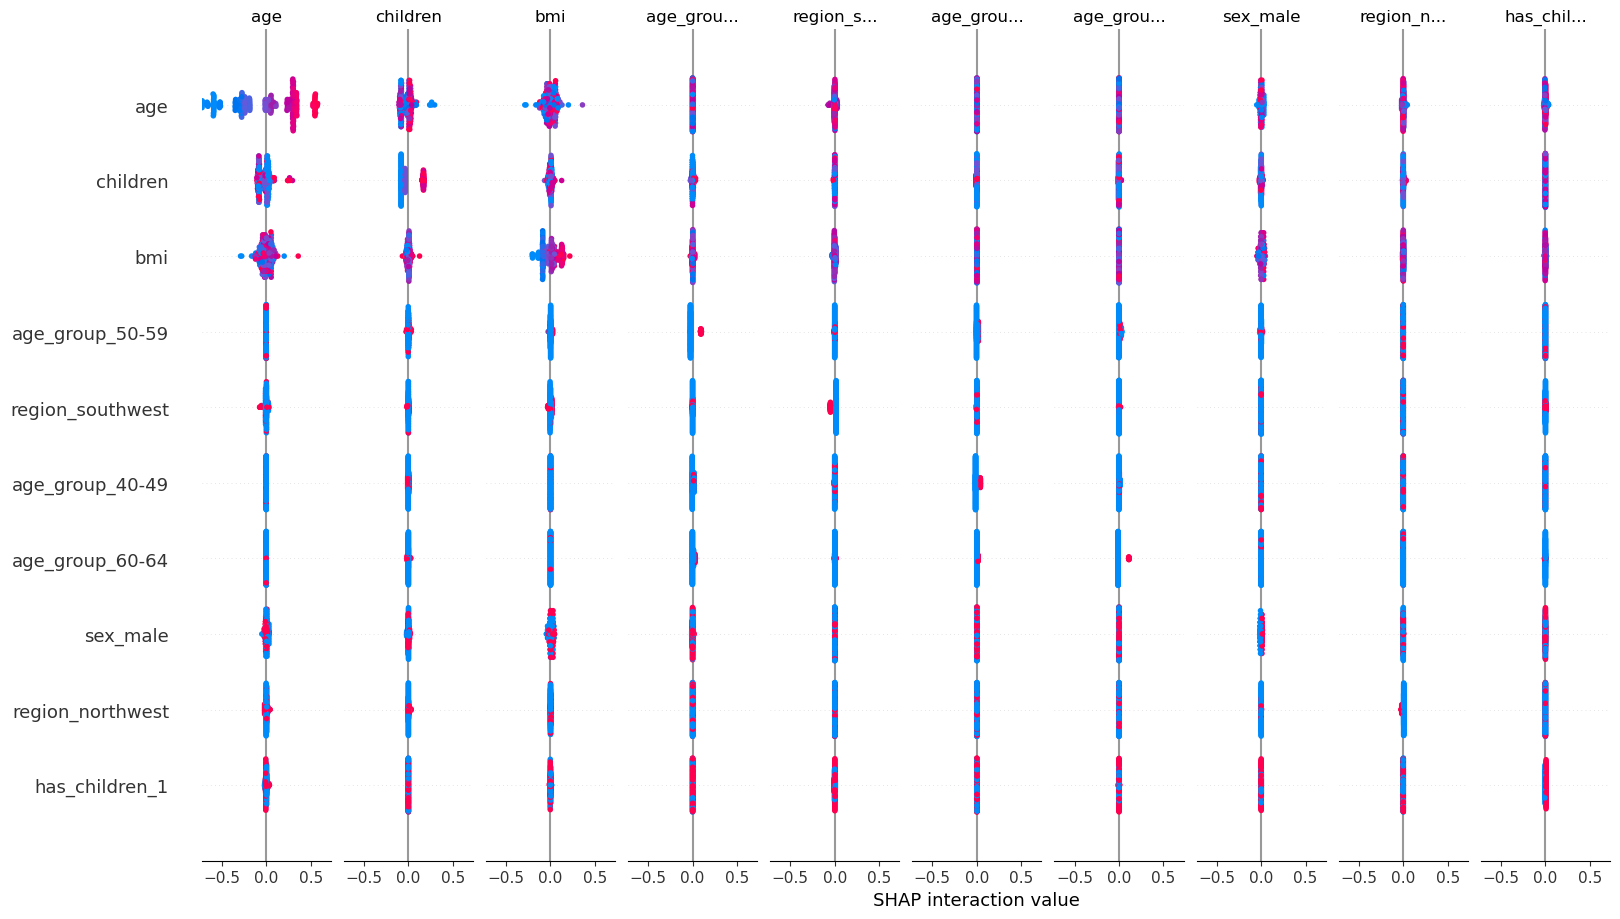

C:\Users\SUBRAT\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\SUBRAT\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\SUBRAT\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Instance 10: Actual 9.81, Predicted 8.81


ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
import shap
import lime
import lime.lime_tabular

# =====================================
# Load and Feature Engineering


# Create new features
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 40, 50, 60, 65],
                         labels=['18-29', '30-39', '40-49', '50-59', '60-64'])

df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100],
                           labels=['underweight', 'normal', 'overweight', 'obese'])

df['has_children'] = df['children'].apply(lambda x: 1 if x > 0 else 0)

# Convert smoker to binary first
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Interaction features
df['smoker_age'] = df['smoker'] * df['age']
df['smoker_bmi'] = df['smoker'] * df['bmi']

# Log transform target
df['log_charges'] = np.log1p(df['charges'])

# =====================================
# Data Preparation
# =====================================
X = df.drop(['charges', 'log_charges'], axis=1)
y = df['log_charges']

# Define features - ensure these match your actual column names
num_features = ['age', 'bmi', 'children', 'smoker_age', 'smoker_bmi']
cat_features = ['sex', 'smoker', 'region', 'age_group', 'bmi_category', 'has_children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after encoding
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(cat_features)
all_feature_names = np.concatenate([num_features, cat_feature_names])

# Convert to DataFrame for better handling
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

# =====================================
# XGBoost Hyperparameter Tuning
# =====================================
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_model,
                         param_grid=param_grid,
                         cv=3,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1,
                         verbose=1)

print("Starting grid search...")
grid_search.fit(X_train_processed_df, y_train)

best_xgb = grid_search.best_estimator_
print("\nBest Params:", grid_search.best_params_)

# =====================================
# Model Evaluation
# =====================================
y_pred = best_xgb.predict(X_test_processed_df)
print(f"\nPerformance:")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}")

# =====================================
# Residual Plot
# =====================================
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log_charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# =====================================
# SHAP Analysis
# =====================================
# Create SHAP explainer
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test_processed_df)

# SHAP Bar Plot
plt.figure()
shap.plots.bar(shap_values, max_display=15)
plt.show()

# SHAP Beeswarm
plt.figure()
shap.plots.beeswarm(shap_values, max_display=15)
plt.show()

# SHAP Dependence for Top Feature
mean_abs_shap = np.abs(shap_values.values).mean(0)
top_feature = all_feature_names[np.argmax(mean_abs_shap)]
print(f"Top feature: {top_feature}")

plt.figure()
shap.plots.scatter(shap_values[:, top_feature])
plt.show()

# SHAP Interaction Analysis
shap_interaction = shap.TreeExplainer(best_xgb).shap_interaction_values(X_test_processed_df)
shap.summary_plot(shap_interaction, X_test_processed_df, max_display=10)

# =====================================
# LIME Analysis
# =====================================
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_processed_df.values,
    feature_names=all_feature_names,
    class_names=['log_charges'],
    mode='regression',
    discretize_continuous=True,
    verbose=False,
    random_state=42
)

# Explain a few instances
for idx in [10, 50, 100]:
    if idx < len(X_test_processed_df):  # Ensure index exists
        print(f"\nInstance {idx}: Actual {y_test.iloc[idx]:.2f}, Predicted {y_pred[idx]:.2f}")
        exp = explainer_lime.explain_instance(
            X_test_processed_df.iloc[idx].values,
            best_xgb.predict,
            num_features=10
        )
        plt.figure()
        exp.as_pyplot_figure()
        plt.title(f"LIME Explanation for Instance {idx}")
        plt.tight_layout()
        plt.show()

# =====================================
# LIME Heatmap Across Instances
# =====================================
n_samples = min(30, len(X_test_processed_df))  # Ensure we don't exceed test set size
coefs_matrix = []
feature_order = []  # To maintain consistent feature ordering

for i in range(n_samples):
    exp = explainer_lime.explain_instance(
        X_test_processed_df.iloc[i].values,
        best_xgb.predict,
        num_features=len(all_feature_names))
    coefs = dict(exp.as_list())
    if not feature_order:  # Get feature order from first explanation
        feature_order = [f[0] for f in exp.as_list()]
    row = [coefs.get(f, 0) for f in feature_order]
    coefs_matrix.append(row)

coefs_matrix = np.array(coefs_matrix)
plt.figure(figsize=(12, 6))
sns.heatmap(coefs_matrix, 
            xticklabels=feature_order, 
           cmap='coolwarm',  # Use Spectral colormap
           center=0)

plt.title("LIME Feature Importance Heatmap Across Instances", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Instances", fontsize=12)

# Fix overlapping x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show() 

# Adaboost

C:\Users\SUBRAT\anaconda3\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['smoker_age' 'smoker_bmi']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\SUBRAT\anaconda3\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['smoker_age' 'smoker_bmi']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Starting grid search...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Parameters: {'estimator__max_depth': 4, 'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}

Performance Metrics:
R²: 0.8544
RMSE: 0.36
MAE: 0.2174
MAPE: 0.0244


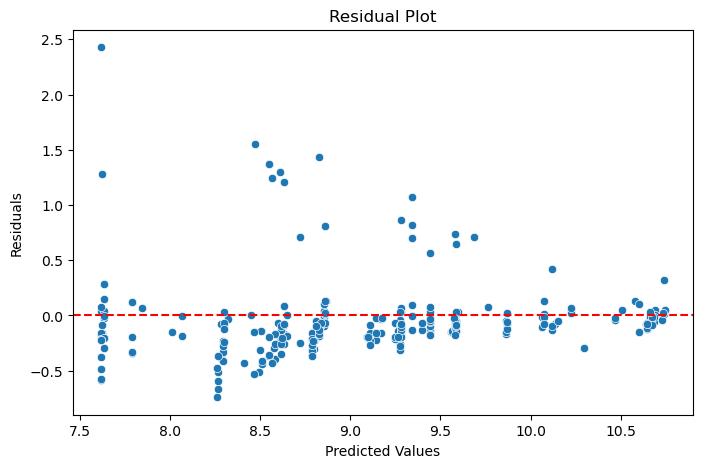

  0%|          | 0/50 [00:00<?, ?it/s]

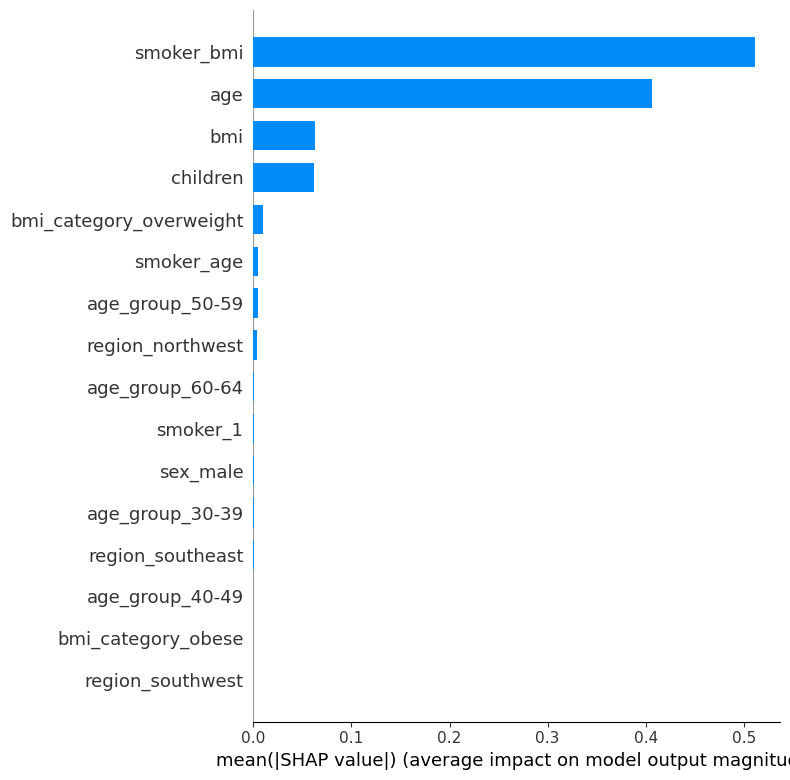

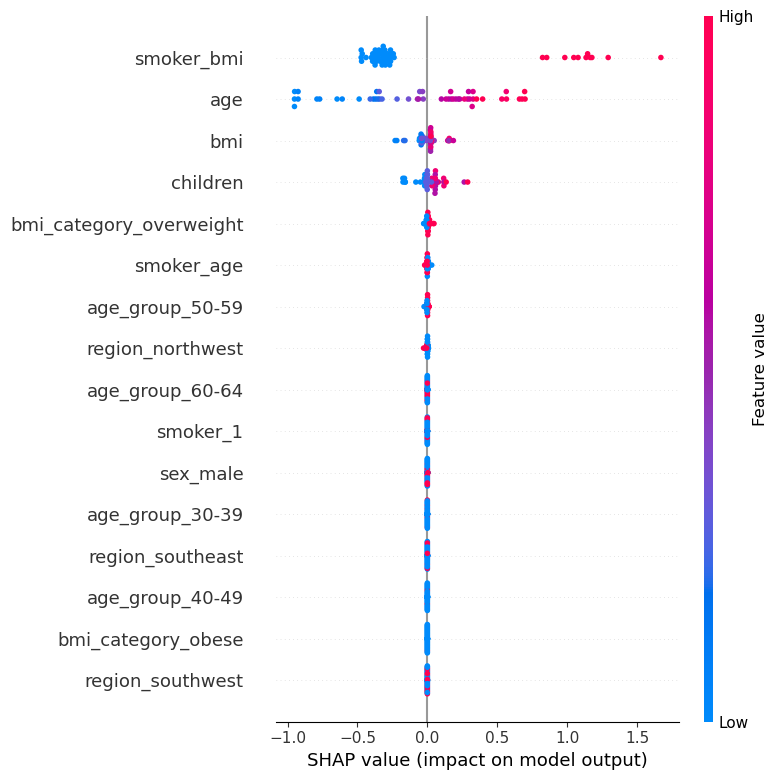

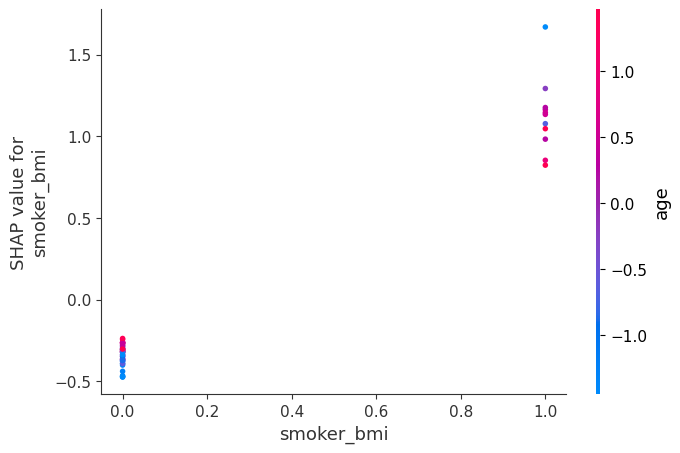


Instance 10: Actual 9.81, Predicted 9.87


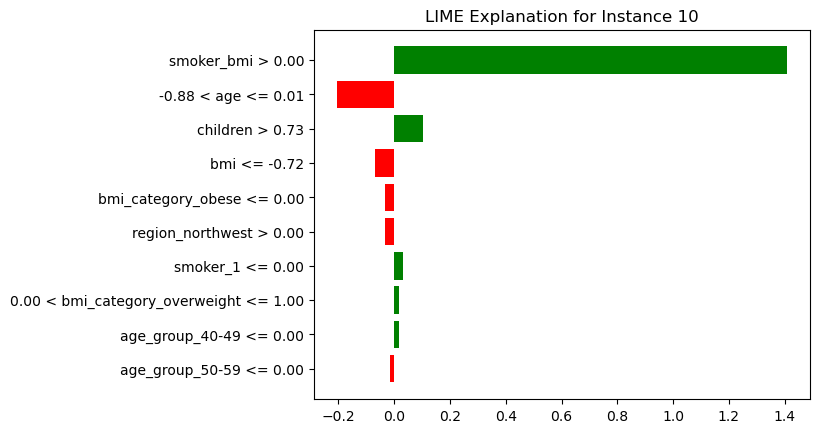


Instance 50: Actual 9.54, Predicted 9.59


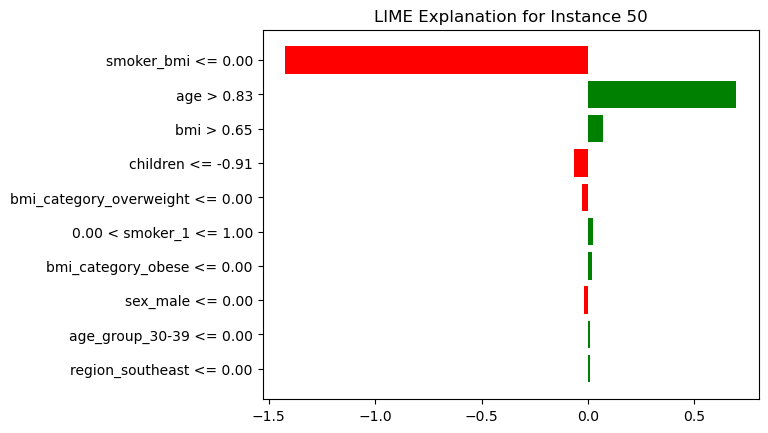


Instance 100: Actual 8.42, Predicted 8.58


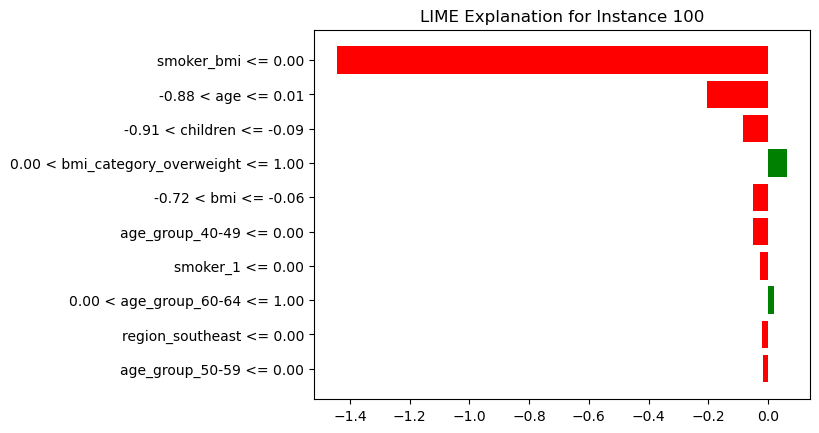

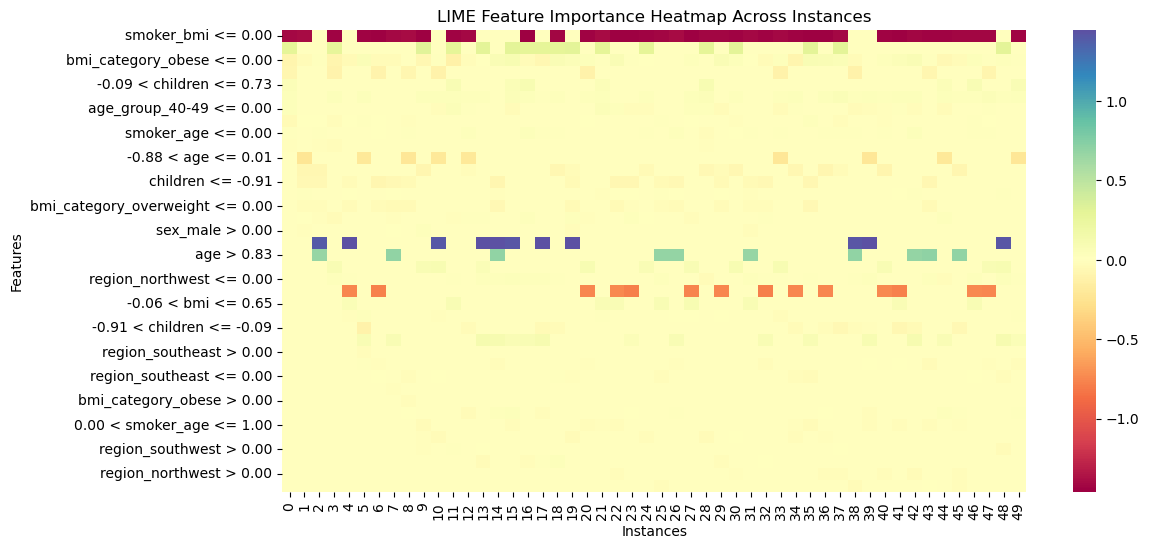

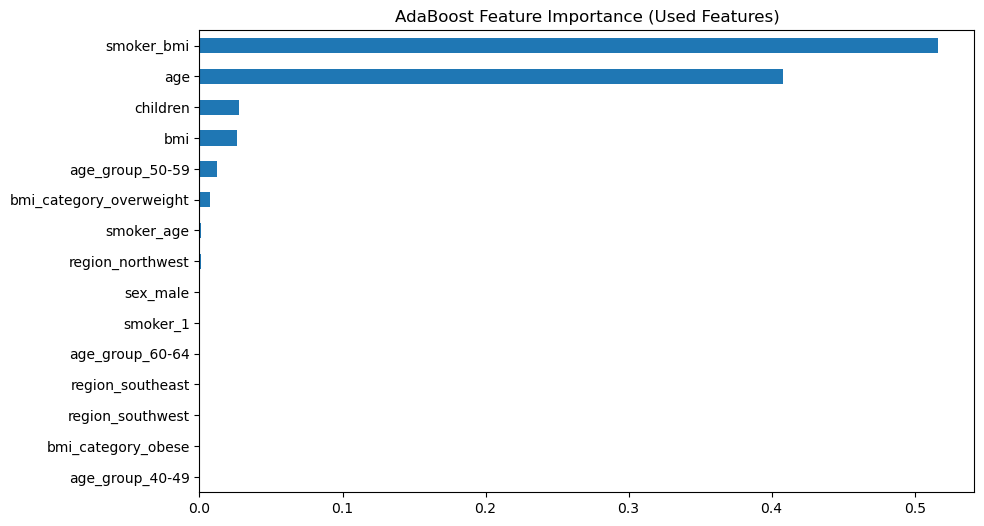

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import shap
import lime
import lime.lime_tabular

# ========================
# Feature Engineering
# ========================
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 40, 50, 60, 65], 
                        labels=['18-29', '30-39', '40-49', '50-59', '60-64'])
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], 
                           labels=['underweight', 'normal', 'overweight', 'obese'])
df['has_children'] = df['children'].apply(lambda x: 1 if x > 0 else 0)
df['smoker_age'] = df['smoker'].map({'yes': 1, 'no': 0}) * df['age']
df['smoker_bmi'] = df['smoker'].map({'yes': 1, 'no': 0}) * df['bmi']
df['log_charges'] = np.log1p(df['charges'])

# ========================
# Data Preparation
# ========================
X = df.drop(['charges', 'log_charges'], axis=1)
y = df['log_charges']

num_features = ['age', 'bmi', 'children', 'smoker_age', 'smoker_bmi']
cat_features = ['sex', 'smoker', 'region', 'age_group', 'bmi_category', 'has_children']

# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), num_features),
        ('cat', Pipeline([('imputer', cat_imputer), ('encoder', OneHotEncoder(drop='first', sparse_output=False))]), cat_features)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

cat_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([num_features, cat_feature_names])

# ========================
# AdaBoost with GridSearch
# ========================
base_estimator = DecisionTreeRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear'],
    'estimator__max_depth': [2, 3, 4]
}

ada = AdaBoostRegressor(estimator=base_estimator, random_state=42)

grid_search = GridSearchCV(ada, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

print("Starting grid search...")
grid_search.fit(X_train_processed, y_train)

print("\nBest Parameters:", grid_search.best_params_)
best_ada = grid_search.best_estimator_

# ========================
# Model Evaluation
# ========================
y_pred = best_ada.predict(X_test_processed)
print(f"\nPerformance Metrics:")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")

# ========================
# Residual Plot
# ========================
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# ========================
# SHAP Analysis (Kernel SHAP)
# ========================
explainer = shap.KernelExplainer(best_ada.predict, X_train_processed[:100])
shap_values = explainer.shap_values(X_test_processed[:50])  # subset for speed

shap.summary_plot(shap_values, X_test_processed[:50], feature_names=all_feature_names, plot_type="bar")
shap.summary_plot(shap_values, X_test_processed[:50], feature_names=all_feature_names)

# SHAP Dependence Plot (Top Feature)
top_feature_idx = np.argsort(np.abs(shap_values).mean(axis=0))[-1]
shap.dependence_plot(top_feature_idx, shap_values, X_test_processed[:50], feature_names=all_feature_names)

# ========================
# LIME Analysis
# ========================
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_processed,
    feature_names=all_feature_names,
    class_names=['log_charges'],
    mode='regression',
    discretize_continuous=True
)

# Explain a few instances
for idx in [10, 50, 100]:
    exp = explainer_lime.explain_instance(X_test_processed[idx], best_ada.predict, num_features=10)
    print(f"\nInstance {idx}: Actual {y_test.iloc[idx]:.2f}, Predicted {y_pred[idx]:.2f}")
    exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Instance {idx}")
    plt.show()
    
# ========================
# LIME Heatmap (Aggregate Explanations)
# ========================
n_samples = 50
lime_weights = []
for i in range(n_samples):
    exp = explainer_lime.explain_instance(X_test_processed[i], best_ada.predict)
    lime_weights.append(dict(exp.as_list()))

# Convert to DataFrame
lime_df = pd.DataFrame(lime_weights).fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(lime_df.T, cmap='Spectral', center=0)
plt.title("LIME Feature Importance Heatmap Across Instances")
plt.xlabel("Instances")
plt.ylabel("Features")
plt.show()

# ========================
# Feature Importance (AdaBoost)
# ========================
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(best_ada.feature_importances_, 
                                index=all_feature_names[:len(best_ada.feature_importances_)])
feature_importances.sort_values().tail(15).plot.barh()
plt.title("AdaBoost Feature Importance (Used Features)")
plt.show()



## CATBOOST

0:	learn: 0.0636576	test: 0.0589763	best: 0.0589763 (0)	total: 98.1ms	remaining: 1m 37s
100:	learn: 0.8426539	test: 0.8600474	best: 0.8600474 (100)	total: 8.94s	remaining: 1m 19s
200:	learn: 0.8624144	test: 0.8632982	best: 0.8634332 (176)	total: 17.5s	remaining: 1m 9s
300:	learn: 0.8744225	test: 0.8642417	best: 0.8648105 (244)	total: 27s	remaining: 1m 2s
400:	learn: 0.8849750	test: 0.8640655	best: 0.8648105 (244)	total: 36.4s	remaining: 54.3s
500:	learn: 0.8963763	test: 0.8637126	best: 0.8648105 (244)	total: 45s	remaining: 44.8s
600:	learn: 0.9061829	test: 0.8635516	best: 0.8648105 (244)	total: 54.8s	remaining: 36.4s
700:	learn: 0.9143903	test: 0.8630865	best: 0.8648105 (244)	total: 1m 4s	remaining: 27.5s
800:	learn: 0.9210985	test: 0.8618580	best: 0.8648105 (244)	total: 1m 14s	remaining: 18.6s
900:	learn: 0.9274784	test: 0.8613089	best: 0.8648105 (244)	total: 1m 24s	remaining: 9.32s
999:	learn: 0.9338015	test: 0.8607793	best: 0.8648105 (244)	total: 1m 33s	remaining: 0us

bestTest = 0.

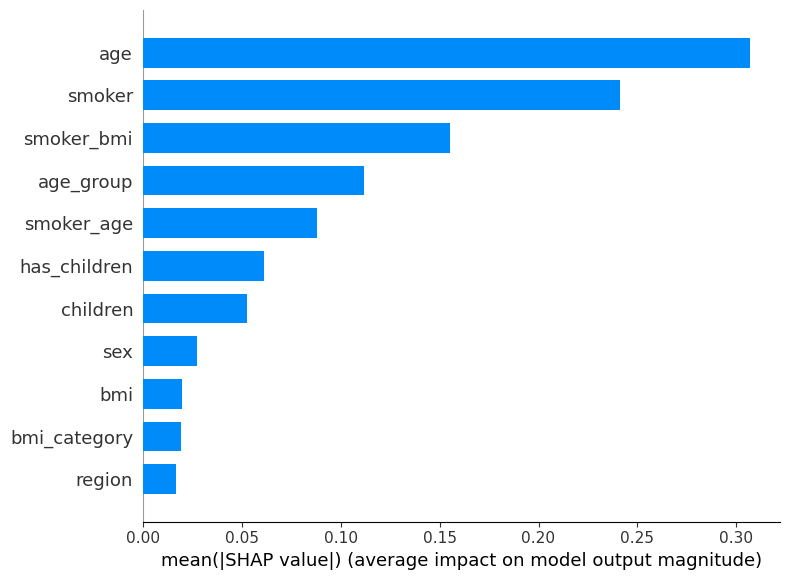

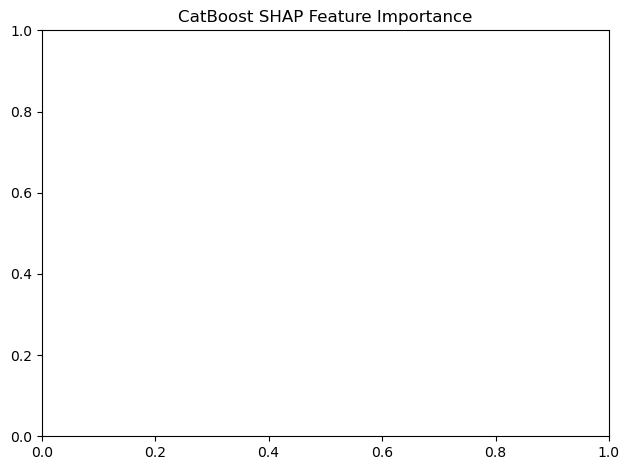

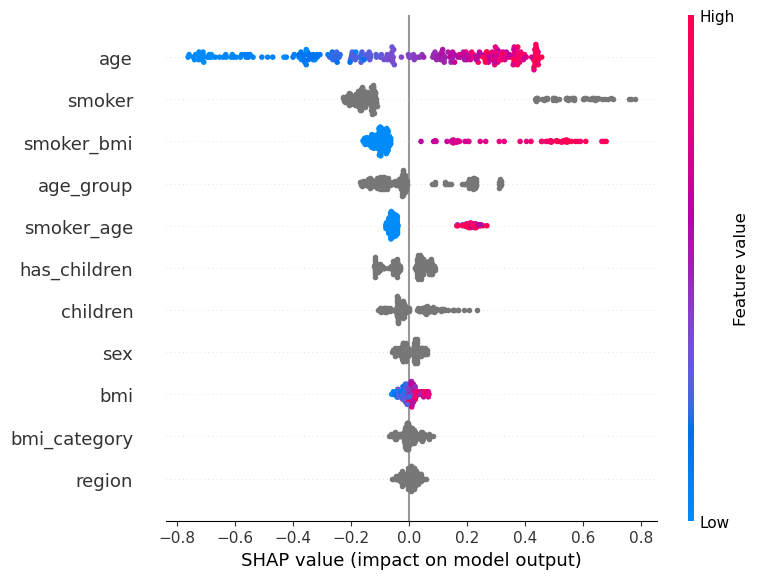

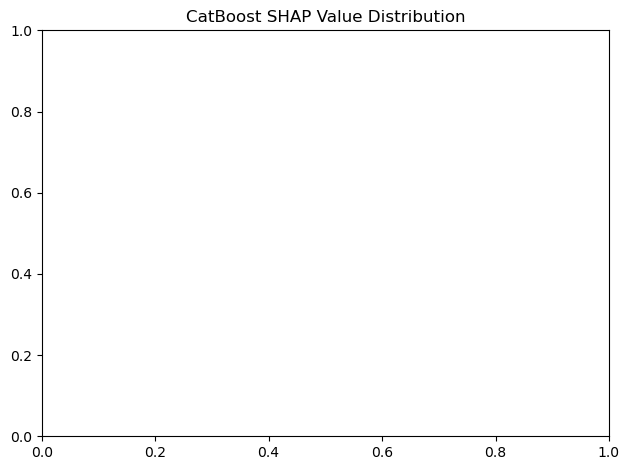


Explaining instance 10...


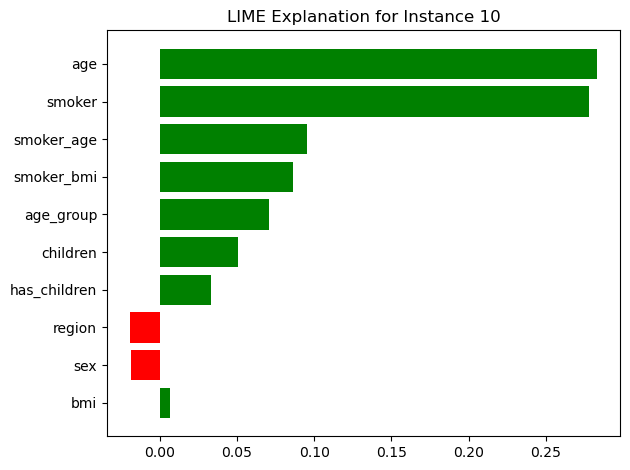


LIME explanation for instance 10:
Actual log charges: 9.81
Predicted log charges: 9.78
age: 0.2829
smoker: 0.2779
smoker_age: 0.0951
smoker_bmi: 0.0866
age_group: 0.0705
children: 0.0506
has_children: 0.0332
region: -0.0191
sex: -0.0184
bmi: 0.0069

Explaining instance 50...


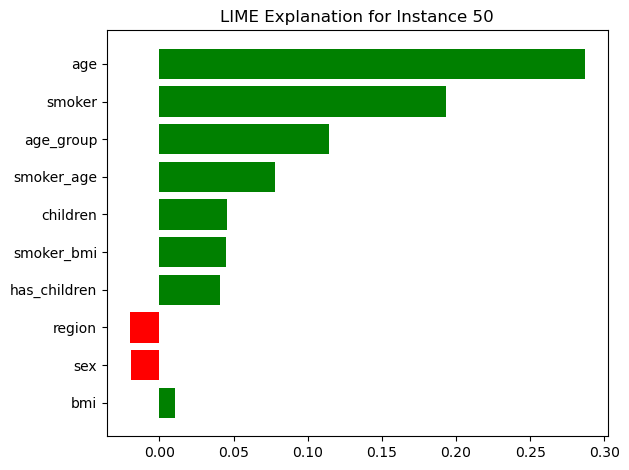


LIME explanation for instance 50:
Actual log charges: 9.54
Predicted log charges: 9.57
age: 0.2868
smoker: 0.1935
age_group: 0.1146
smoker_age: 0.0777
children: 0.0455
smoker_bmi: 0.0452
has_children: 0.0410
region: -0.0199
sex: -0.0191
bmi: 0.0108

Explaining instance 100...


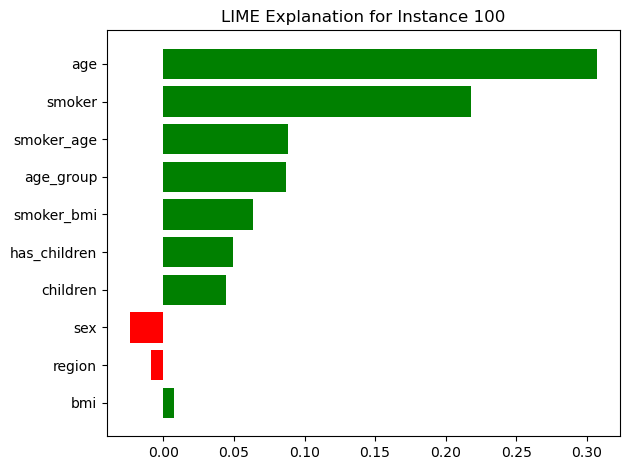


LIME explanation for instance 100:
Actual log charges: 8.42
Predicted log charges: 8.63
age: 0.3071
smoker: 0.2181
smoker_age: 0.0879
age_group: 0.0869
smoker_bmi: 0.0637
has_children: 0.0496
children: 0.0446
sex: -0.0235
region: -0.0089
bmi: 0.0074


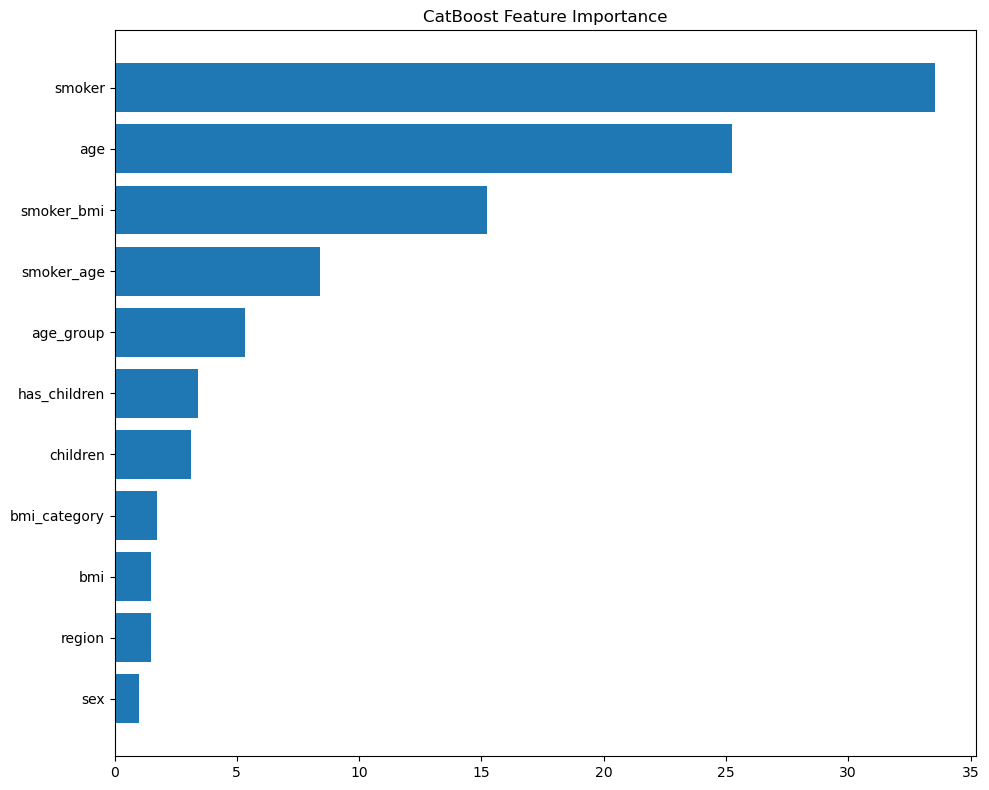

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import shap
import lime
import lime.lime_tabular
from sklearn.preprocessing import LabelEncoder



## =====================================
## Feature Engineering (adjusted for CatBoost)
## =====================================

# Convert numerical categoricals to strings
df['children'] = df['children'].astype(str)
df['has_children'] = df['children'].apply(lambda x: '1' if x != '0' else '0')

# Create categorical features
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 40, 50, 60, 65], 
                        labels=['18-29', '30-39', '40-49', '50-59', '60-64'])

df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], 
                           labels=['underweight', 'normal', 'overweight', 'obese'])

# Create interaction features (keep as numerical)
df['smoker_age'] = (df['smoker'] == 'yes').astype(int) * df['age']
df['smoker_bmi'] = (df['smoker'] == 'yes').astype(int) * df['bmi']

# Log transform charges
df['log_charges'] = np.log1p(df['charges'])

## =====================================
## Data Preparation for CatBoost
## =====================================

# Define features and target
X = df.drop(['charges', 'log_charges'], axis=1)
y = df['log_charges']

# Identify categorical features (must be string or int)
cat_features = ['sex', 'smoker', 'region', 'age_group', 'bmi_category', 'children', 'has_children']

# Verify all categoricals are strings
for col in cat_features:
    X[col] = X[col].astype(str)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost Pool
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

## =====================================
## CatBoost Model with Tuning (simplified)
## =====================================

# Initialize CatBoost with reasonable defaults
cat_model = CatBoostRegressor(
    iterations=1000,
    depth=6,
    learning_rate=0.05,
    l2_leaf_reg=3,
    loss_function='RMSE',
    eval_metric='R2',
    random_seed=42,
    verbose=100  # Show progress every 100 trees
)

# Fit model
cat_model.fit(train_pool, eval_set=test_pool)

# Evaluate
y_pred = cat_model.predict(X_test)
print(f"\nModel Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

## =====================================
## SHAP Analysis
## =====================================

# Initialize SHAP explainer
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(test_pool)

# Global feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("CatBoost SHAP Feature Importance")
plt.tight_layout()
plt.show()

# Detailed SHAP plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)
plt.title("CatBoost SHAP Value Distribution")
plt.tight_layout()
plt.show()

## =====================================
## LIME Analysis
## =====================================
# Create a label-encoded version of the data for LIME
X_train_lime = X_train.copy()
X_test_lime = X_test.copy()

# Label encode all categorical features
label_encoders = {}
for col in cat_features:  # Ensure cat_features includes all categorical columns
    le = LabelEncoder()
    X_train_lime[col] = le.fit_transform(X_train_lime[col])
    X_test_lime[col] = le.transform(X_test_lime[col])
    label_encoders[col] = le

# Scale numerical features
num_cols = ['age', 'bmi', 'smoker_age', 'smoker_bmi']
scaler = StandardScaler()
X_train_lime[num_cols] = scaler.fit_transform(X_train_lime[num_cols])
X_test_lime[num_cols] = scaler.transform(X_test_lime[num_cols])

# Convert to numpy arrays
X_train_lime_arr = X_train_lime.values
X_test_lime_arr = X_test_lime.values

# Initialize LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_lime_arr,
    feature_names=list(X_train_lime.columns),
    class_names=['log_charges'],
    mode='regression',
    verbose=False,
    discretize_continuous=False
)

# Prediction wrapper that handles label encoding
def predict_fn(x):
    # Convert to DataFrame
    x_df = pd.DataFrame(x, columns=X_train_lime.columns)

    # Inverse transform numerical features
    x_df[num_cols] = scaler.inverse_transform(x_df[num_cols])

    # Inverse transform categorical features (fix range issues)
    for col in cat_features:
        le = label_encoders[col]
        # Clip to valid range
        x_df[col] = x_df[col].round().astype(int)
        x_df[col] = np.clip(x_df[col], 0, len(le.classes_) - 1)
        x_df[col] = le.inverse_transform(x_df[col])

    return cat_model.predict(x_df)


# Explain specific instances
for idx in [10, 50, 100]:
    print(f"\nExplaining instance {idx}...")
    
    # Get LIME explanation
    exp = explainer_lime.explain_instance(
        X_test_lime_arr[idx], 
        predict_fn, 
        num_features=10
    )
    
    # Show explanation
    fig = exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Instance {idx}")
    plt.tight_layout()
    plt.savefig(f'lime_explanation_{idx}.png')
    plt.show()
    
    # Print explanation in console
    print(f"\nLIME explanation for instance {idx}:")
    print(f"Actual log charges: {y_test.iloc[idx]:.2f}")
    print(f"Predicted log charges: {y_pred[idx]:.2f}")
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.4f}")

## =====================================
## Feature Importance
## =====================================

# Plot CatBoost's built-in feature importance
feature_importance = cat_model.get_feature_importance()
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.savefig('catboost_importance.png')
plt.show()


In [3]:
!pip install catboost

In [6]:
!pip install LightGBM

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 1.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.5 MB 1.8 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 2.5 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 2.9 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.5 MB 3.6 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.6 MB/s eta 0:00:00


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 1374.92
[100]	valid_0's rmse: 920.726
[150]	valid_0's rmse: 903.442
[200]	valid_0's rmse: 905.648
Early stopping, best iteration is:
[179]	valid_0's rmse: 893.79
RMSE: 893.79
R2 Score: 0.99


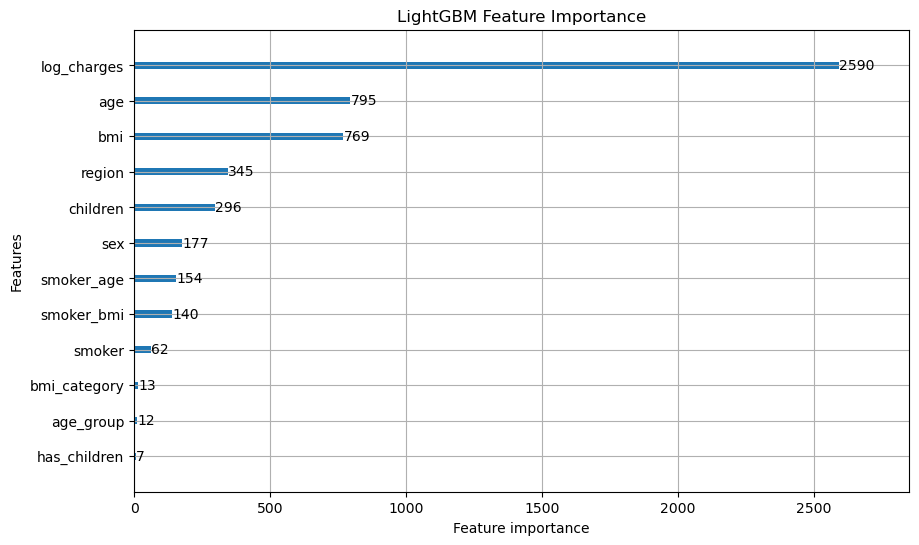

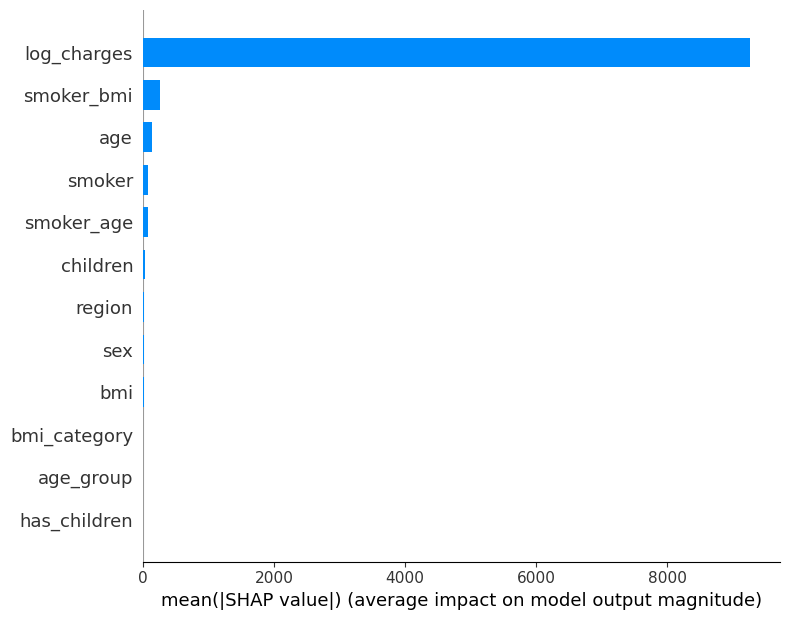

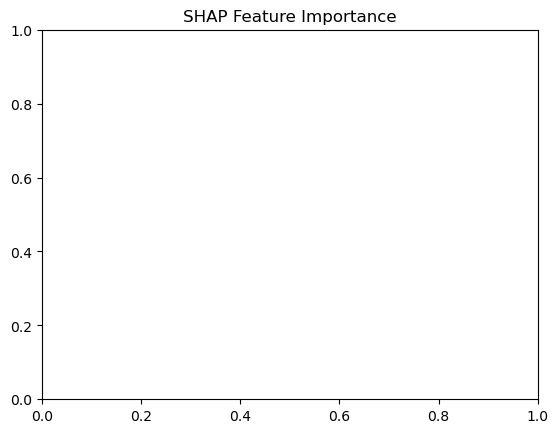

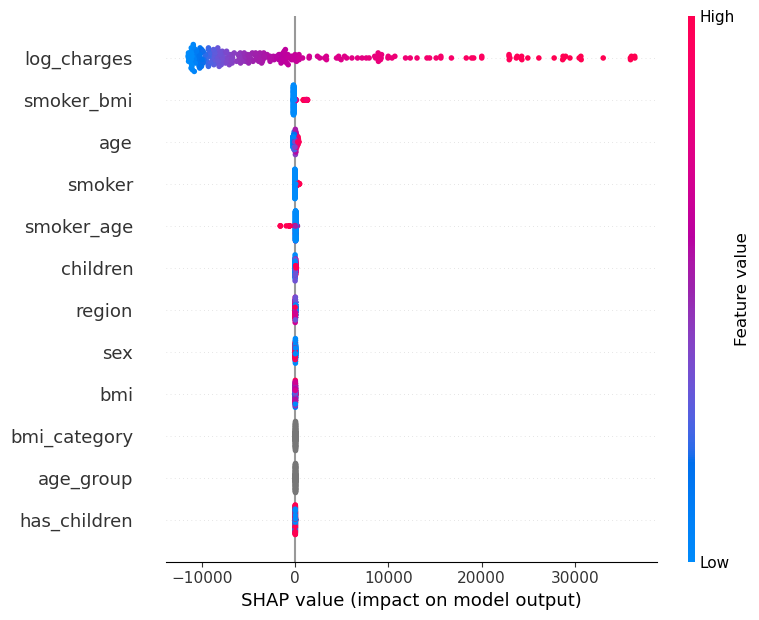

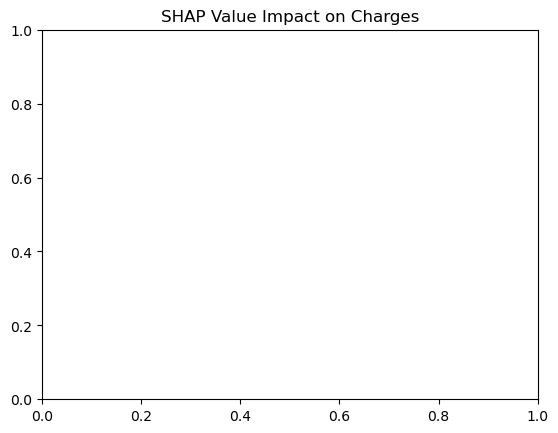

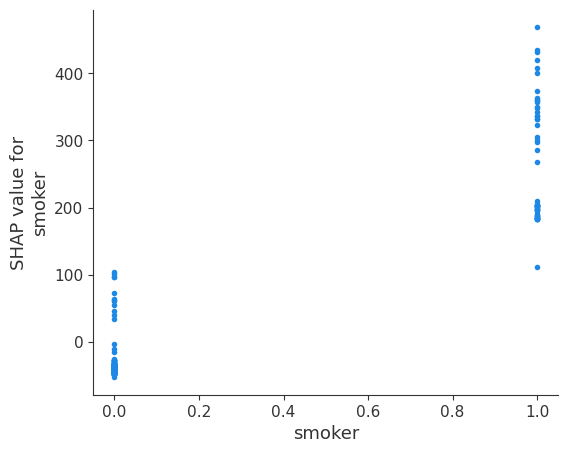

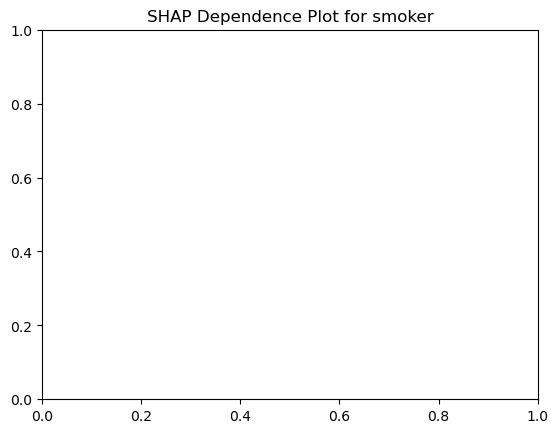

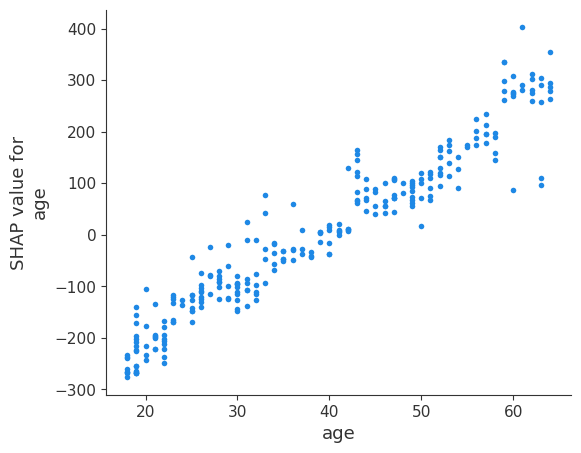

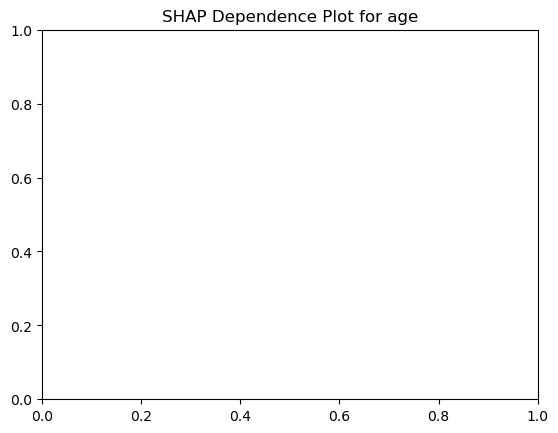

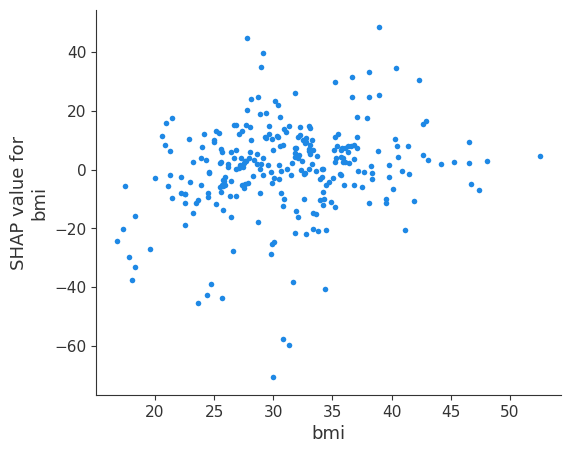

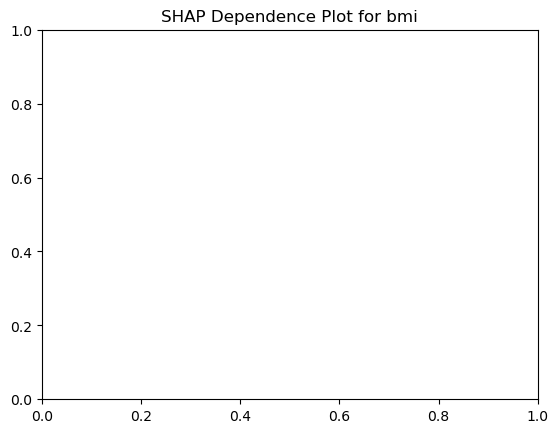

ValueError: could not convert string to float: 'normal'

In [17]:
# ------------------------
# IMPORT LIBRARIES
# ------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import shap
import lime.lime_tabular
from lime import submodular_pick

# ------------------------


# Handle possible string ranges like "40-49" -> convert to midpoint
def convert_range_to_midpoint(value):
    if isinstance(value, str) and '-' in value:
        low, high = map(int, value.split('-'))
        return (low + high) / 2
    else:
        try:
            return float(value)
        except:
            return value

for col in df.columns:
    df[col] = df[col].apply(convert_range_to_midpoint)

# Encode categorical columns
categorical_cols = ['sex', 'smoker', 'region']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# ------------------------
# SPLIT DATA
# ------------------------
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------
# LIGHTGBM TRAINING
# ------------------------
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)
    ]
)

# ------------------------
# EVALUATION
# ------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# ------------------------
# FEATURE IMPORTANCE
# ------------------------
lgb.plot_importance(model, figsize=(10, 6))
plt.title("LightGBM Feature Importance")
plt.show()

# ------------------------
# SHAP ANALYSIS
# ------------------------
explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test)

# SHAP summary (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("SHAP Feature Importance")
plt.show()

# SHAP summary (beeswarm)
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Value Impact on Charges")
plt.show()

# SHAP dependence plots for important features
for feature in ['smoker', 'age', 'bmi']:
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.show()

# ------------------------
# LIME ANALYSIS
# ------------------------

# Wrapper function for LIME
def model_predict_wrapper(raw_data):
    """
    raw_data: numpy array from LIME with original feature values
    Returns: predictions from LightGBM
    """
    temp_df = pd.DataFrame(raw_data, columns=X_train.columns)
    return model.predict(temp_df)

# Ensure numeric arrays for LIME
X_train_lime = X_train.values.astype(float)
X_test_lime = X_test.values.astype(float)

# Identify categorical feature indexes
categorical_features = [i for i, col in enumerate(X_train.columns) if col in categorical_cols]

# Initialize LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_lime,
    feature_names=X_train.columns.tolist(),
    class_names=['charges'],
    categorical_features=categorical_features,
    verbose=True,
    mode='regression'
)

# Explain one instance
idx = 0
exp = explainer_lime.explain_instance(
    X_test_lime[idx],
    model_predict_wrapper,
    num_features=6
)

fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {idx}")
plt.show()

# Submodular Pick for multiple explanations
sp_obj = submodular_pick.SubmodularPick(
    explainer_lime,
    X_test_lime,
    model_predict_wrapper,
    sample_size=10,
    num_features=6,
    num_exps_desired=3
)

for e in sp_obj.sp_explanations:
    fig = e.as_pyplot_figure()
    plt.show()



Categorical columns: []
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 1374.92
[100]	valid_0's rmse: 920.726
[150]	valid_0's rmse: 903.442
[200]	valid_0's rmse: 905.648
Early stopping, best iteration is:
[179]	valid_0's rmse: 893.79
Test RMSE: 893.79
Test R²: 0.99
Train R²: 1.00, Test R²: 0.99
Cross-validated R²: 0.9959


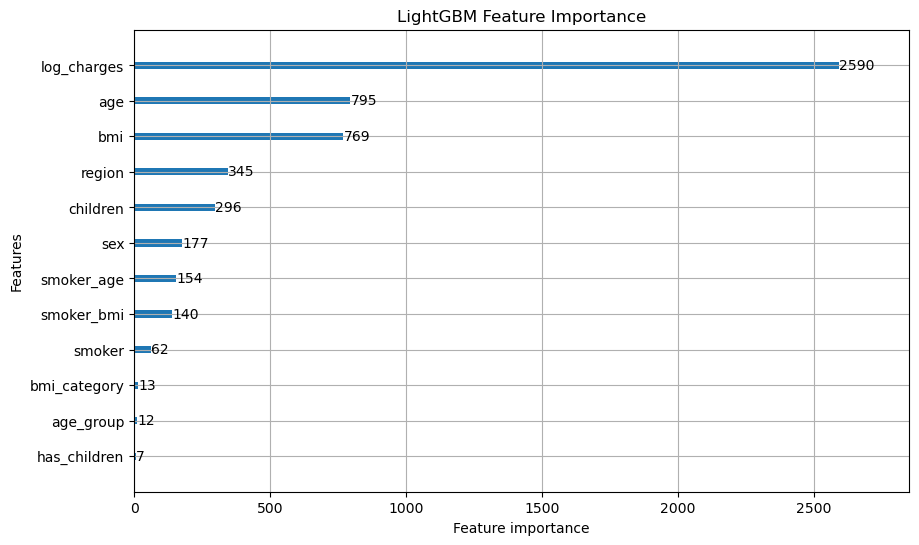

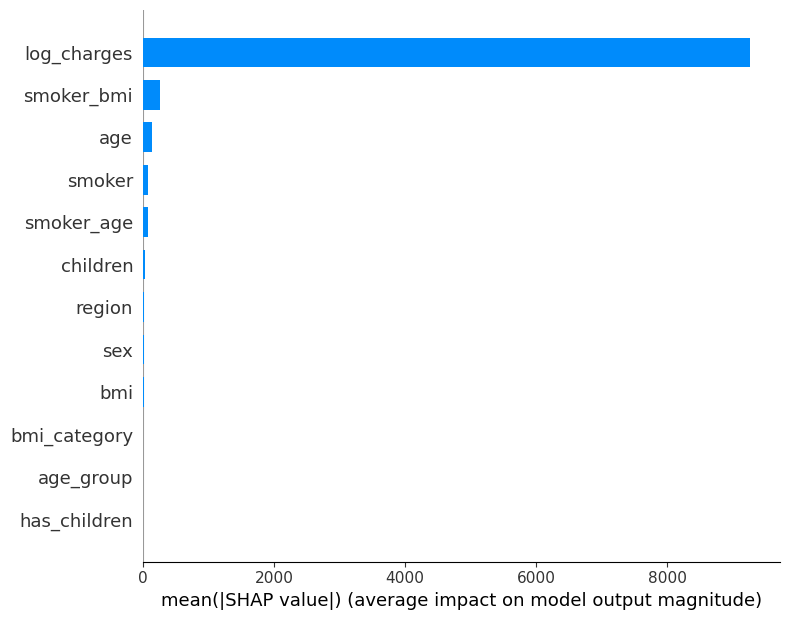

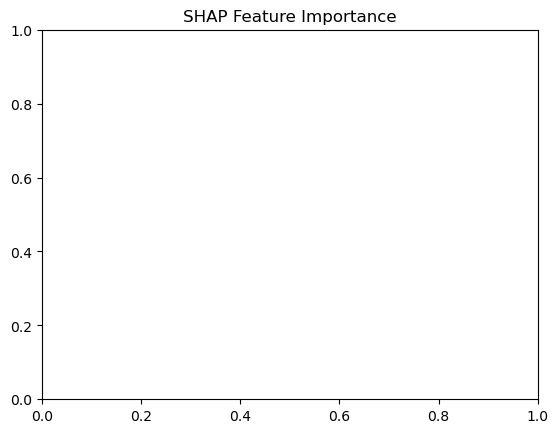

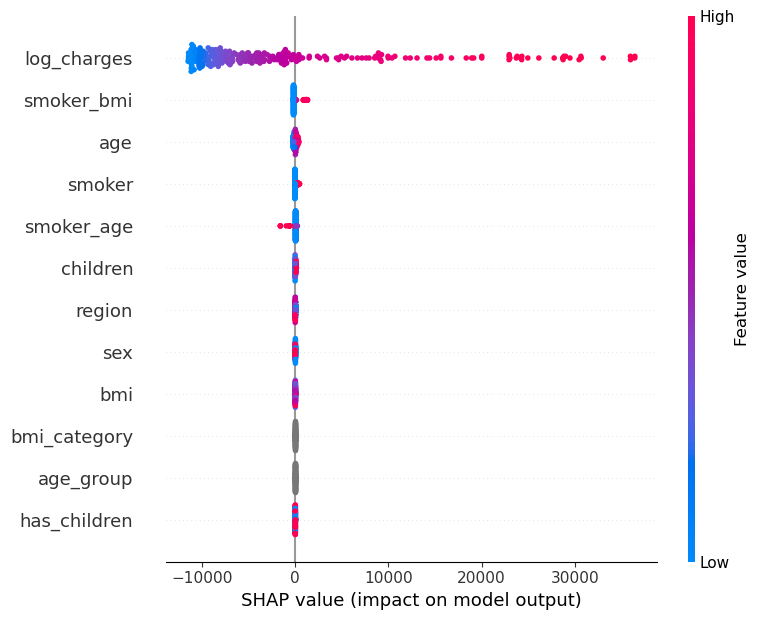

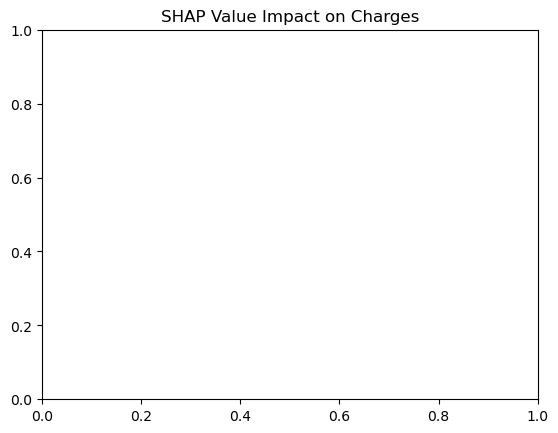

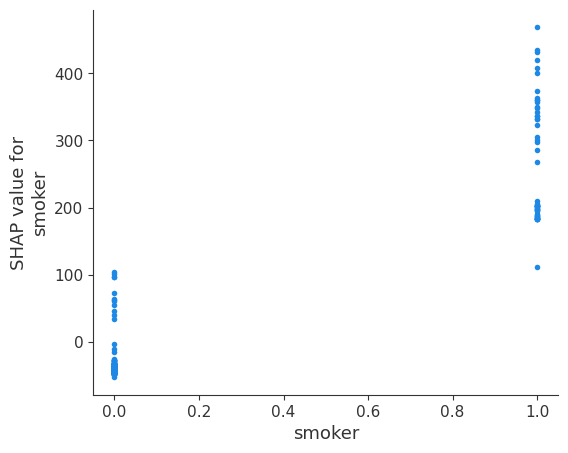

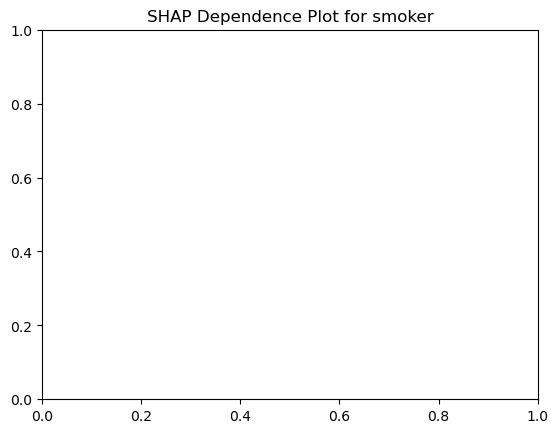

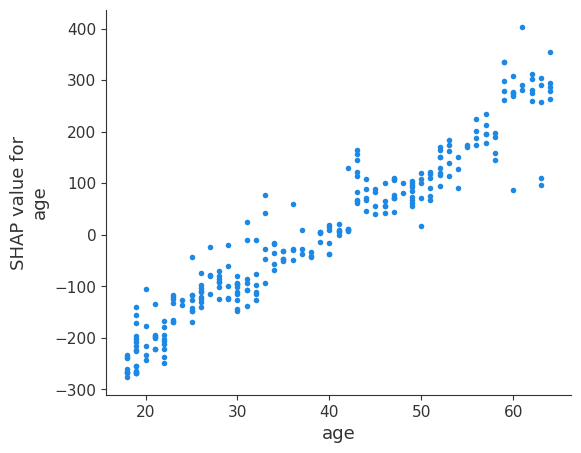

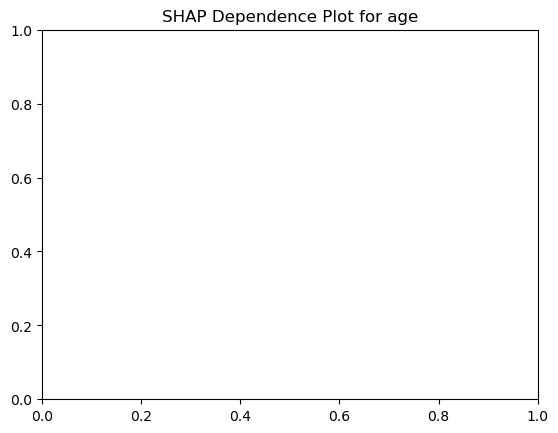

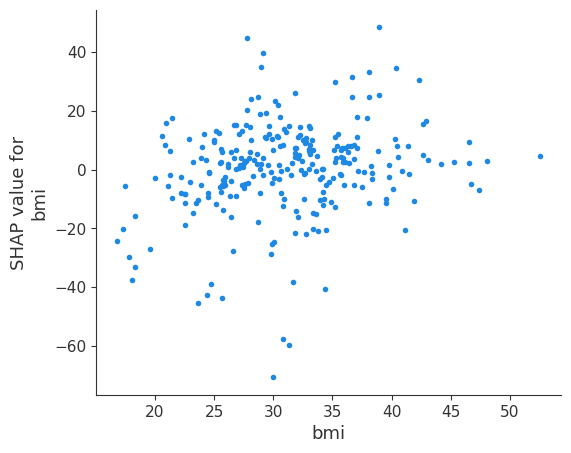

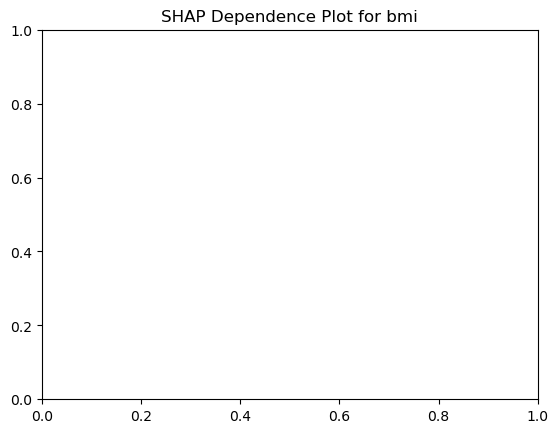

ValueError: could not convert string to float: 'normal'

In [19]:
# ------------------------
# IMPORT LIBRARIES
# ------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import shap
import lime.lime_tabular
from lime import submodular_pick



# Handle possible string ranges like "40-49" -> convert to midpoint
def convert_range_to_midpoint(value):
    if isinstance(value, str) and '-' in value:
        low, high = map(int, value.split('-'))
        return (low + high) / 2
    else:
        try:
            return float(value)
        except:
            return value

for col in df.columns:
    df[col] = df[col].apply(convert_range_to_midpoint)

# Identify categorical columns (still strings)
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical columns:", categorical_cols)

# Encode all categorical columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# ------------------------
# SPLIT DATA
# ------------------------
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------
# LIGHTGBM TRAINING
# ------------------------
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)
    ]
)

# ------------------------
# CHECK PERFORMANCE
# ------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")

# Compare Train vs Test
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Train R²: {r2_train:.2f}, Test R²: {r2:.2f}")

# ------------------------
# CROSS-VALIDATION CHECK
# ------------------------
from lightgbm import LGBMRegressor
cv_model = LGBMRegressor(**params)
scores = cross_val_score(cv_model, X, y, scoring='r2', cv=5)
print(f"Cross-validated R²: {scores.mean():.4f}")

# ------------------------
# FEATURE IMPORTANCE
# ------------------------
lgb.plot_importance(model, figsize=(10, 6))
plt.title("LightGBM Feature Importance")
plt.show()

# ------------------------
# SHAP ANALYSIS
# ------------------------
explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test)

# SHAP summary plots
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("SHAP Feature Importance")
plt.show()

shap.summary_plot(shap_values, X_test)
plt.title("SHAP Value Impact on Charges")
plt.show()

# SHAP dependence plots
for feature in ['smoker', 'age', 'bmi']:
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.show()

# ------------------------
# LIME ANALYSIS
# ------------------------

# Prepare numeric data for LIME
X_train_lime = X_train.values.astype(float)
X_test_lime = X_test.values.astype(float)

# Wrapper for LIME predictions
def model_predict_wrapper(raw_data):
    temp_df = pd.DataFrame(raw_data, columns=X_train.columns)
    return model.predict(temp_df)

# Identify categorical feature indexes
categorical_features = [i for i, col in enumerate(X_train.columns) if col in categorical_cols]

# Initialize LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_lime,
    feature_names=X_train.columns.tolist(),
    class_names=['charges'],
    categorical_features=categorical_features,
    verbose=True,
    mode='regression'
)

# Explain one instance
idx = 0
exp = explainer_lime.explain_instance(
    X_test_lime[idx],
    model_predict_wrapper,
    num_features=6
)

fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {idx}")
plt.show()

# Submodular Pick for multiple representative explanations
sp_obj = submodular_pick.SubmodularPick(
    explainer_lime,
    X_test_lime,
    model_predict_wrapper,
    sample_size=10,
    num_features=6,
    num_exps_desired=3
)

for e in sp_obj.sp_explanations:
    fig = e.as_pyplot_figure()
    plt.show()


Selected 24 features based on MI scores:
age                         1.503294
age_squared                 1.497051
age_children_interaction    0.823611
age_bmi                     0.712393
risk_factor                 0.657868
smoker_bmi                  0.516741
smoker_age                  0.514622
smoker                      0.369393
age_group_46-55             0.307235
age_group_56-65             0.278354
age_group_36-45             0.242794
age_group_26-35             0.218105
sex_male                    0.176285
children                    0.161018
has_children                0.144626
children_cat_2-3            0.079096
bmi                         0.068337
bmi_squared                 0.064012
region_northwest            0.058334
bmi_category_overweight     0.043861
Name: MI_Score, dtype: float64
Starting grid search...
Fitting 5 folds for each of 8748 candidates, totalling 43740 fits

Best Params: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 3, 'n_es

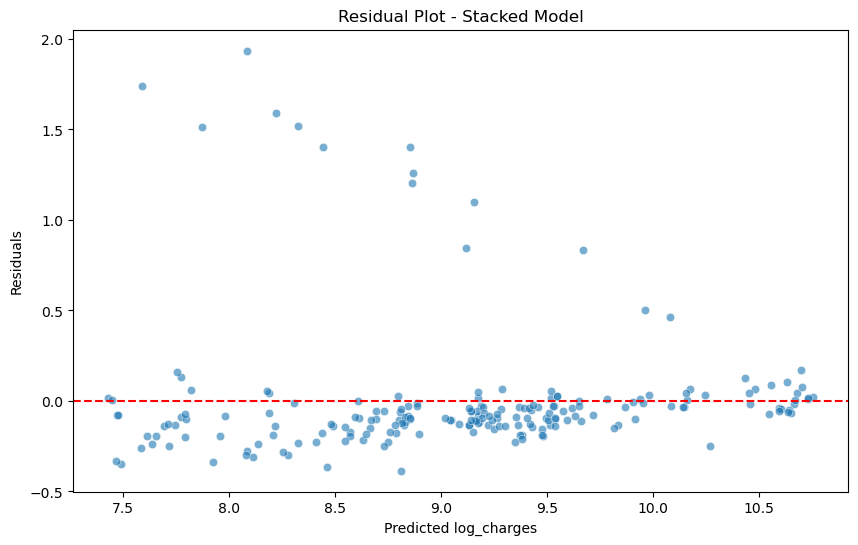

<Figure size 1200x800 with 0 Axes>

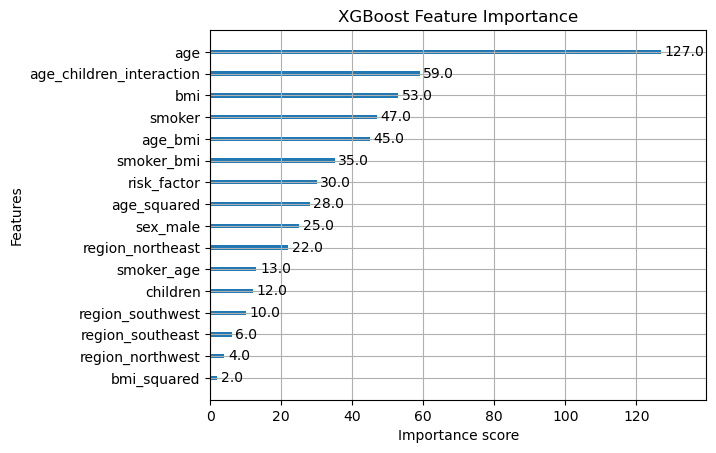

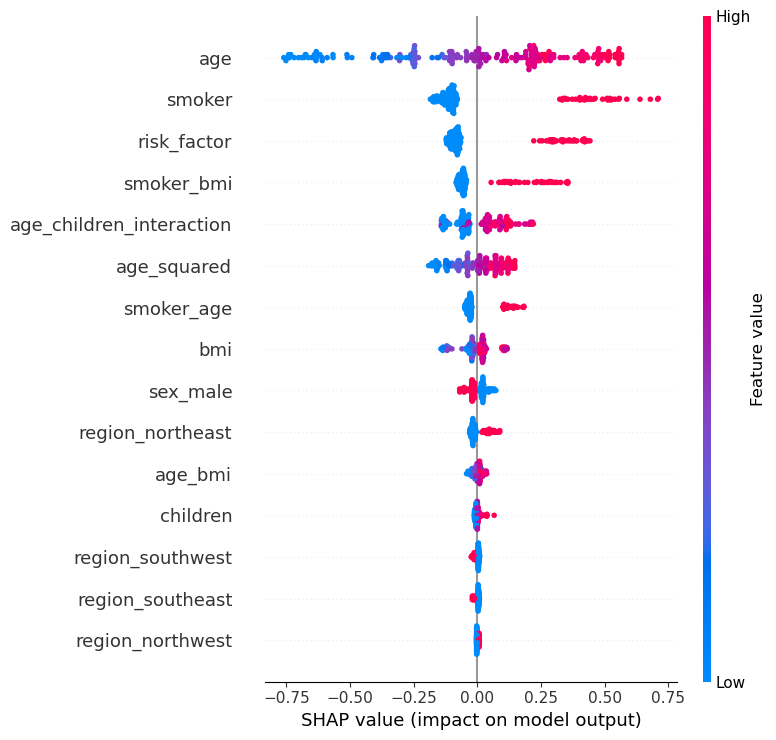

<Figure size 640x480 with 0 Axes>

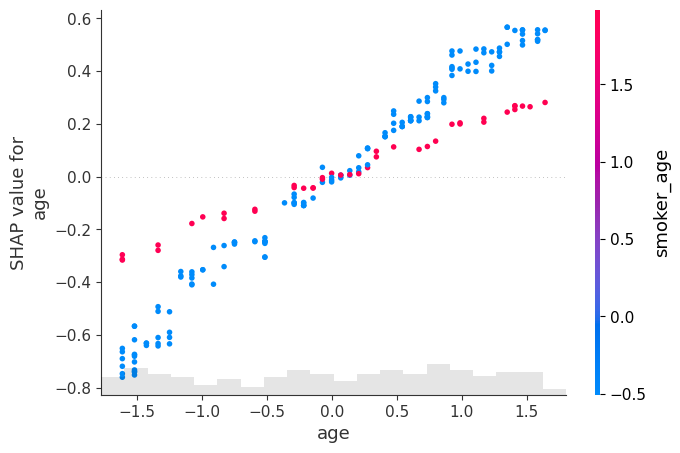

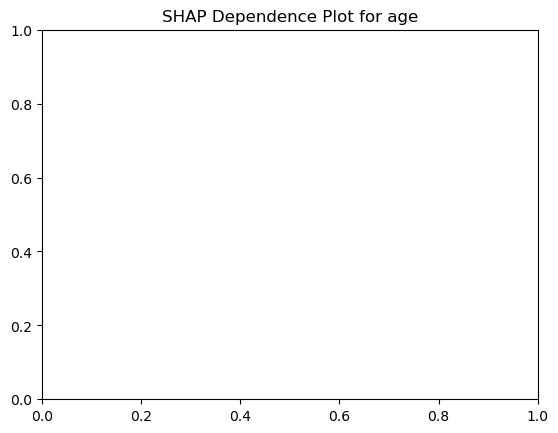

<Figure size 640x480 with 0 Axes>

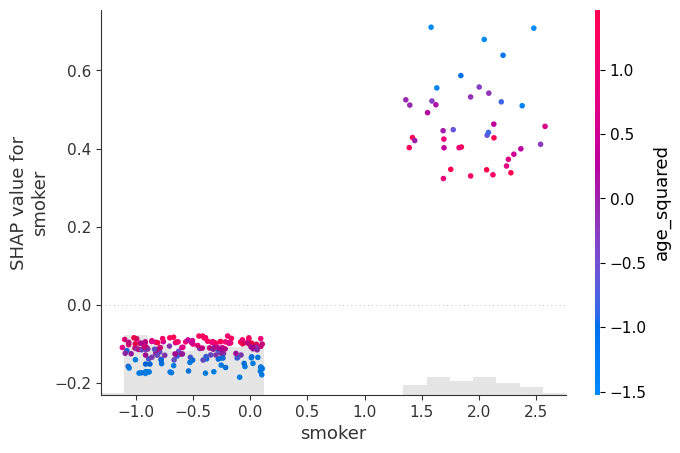

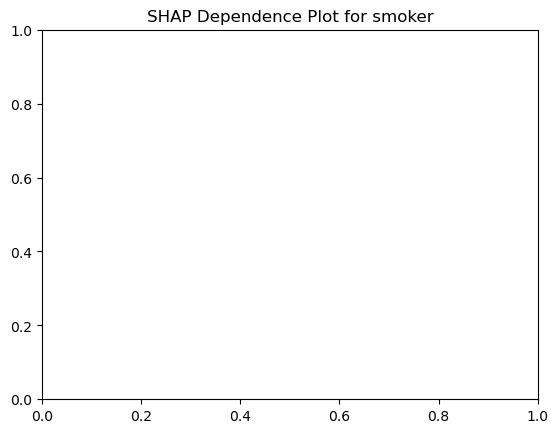

<Figure size 640x480 with 0 Axes>

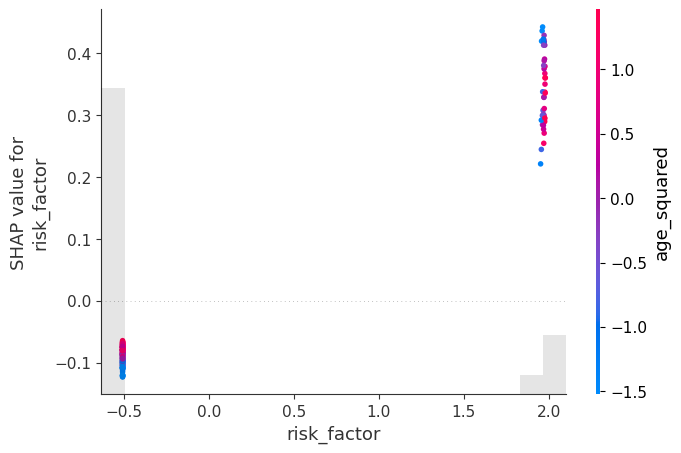

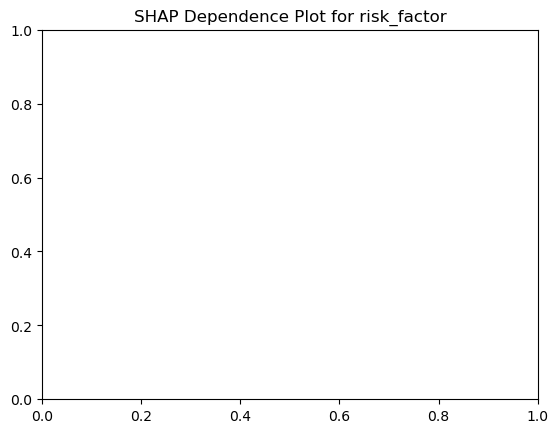

<Figure size 800x500 with 0 Axes>

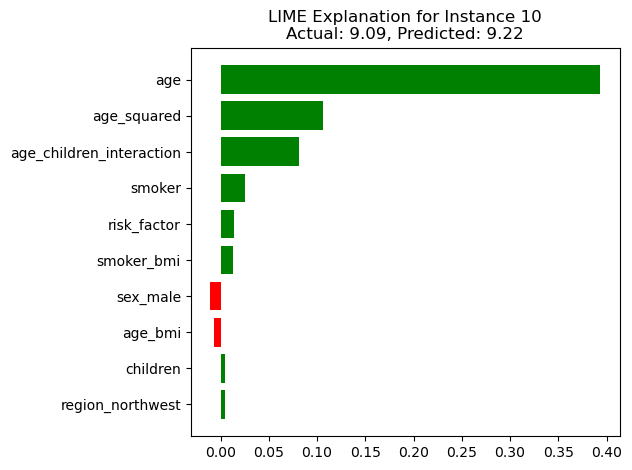

<Figure size 800x500 with 0 Axes>

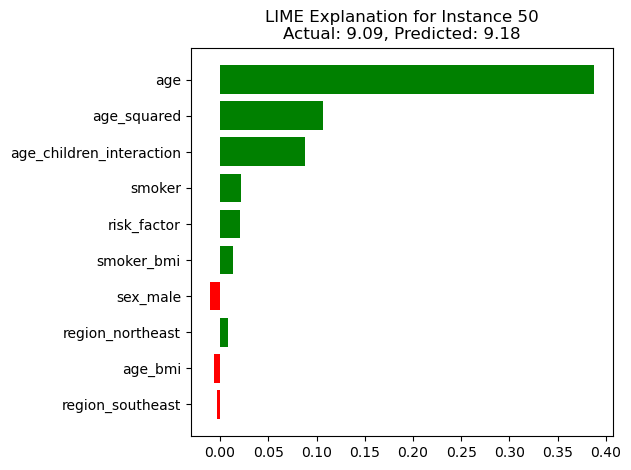

<Figure size 800x500 with 0 Axes>

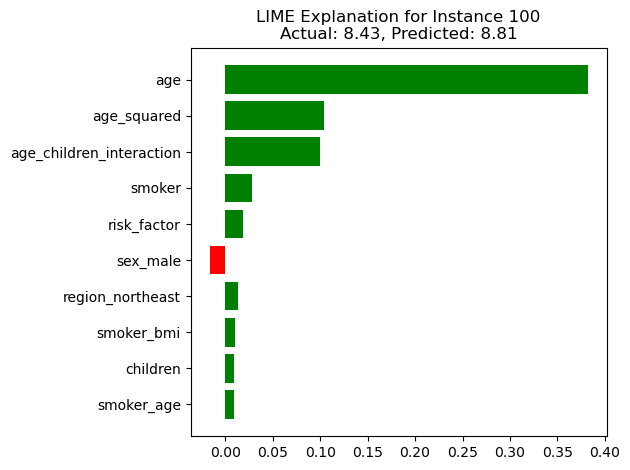

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import mutual_info_regression
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
import shap
import lime
import lime.lime_tabular

# =====================================
# Load and Enhanced Feature Engineering
# =====================================
# Assuming df is loaded with the insurance data
# Create more sophisticated features
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65],
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, 40, 100],
                           labels=['underweight', 'normal', 'overweight', 'obese1', 'obese2', 'obese3'])

df['has_children'] = df['children'].apply(lambda x: 1 if x > 0 else 0)
df['children_cat'] = pd.cut(df['children'], bins=[-1, 0, 1, 3, 6],
                           labels=['0', '1', '2-3', '4+'])

# Convert smoker to binary
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# More interaction features
df['smoker_age'] = df['smoker'] * df['age']
df['smoker_bmi'] = df['smoker'] * df['bmi']
df['age_bmi'] = df['age'] * df['bmi']
df['age_squared'] = df['age'] ** 2
df['bmi_squared'] = df['bmi'] ** 2

# More complex features
df['risk_factor'] = df['age'] * df['bmi'] * df['smoker']
df['age_children_interaction'] = df['age'] * df['children']

# Log transform target
df['log_charges'] = np.log1p(df['charges'])

# =====================================
# Feature Selection
# =====================================
# Prepare features for MI calculation
X_temp = df.drop(['charges', 'log_charges'], axis=1)
y_temp = df['log_charges']

# Preprocess temporarily for MI
cat_cols = X_temp.select_dtypes(include=['object', 'category']).columns
num_cols = X_temp.select_dtypes(include=['int64', 'float64']).columns

preprocessor_temp = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ])

X_temp_processed = preprocessor_temp.fit_transform(X_temp)
feature_names = np.concatenate([num_cols, preprocessor_temp.named_transformers_['cat'].get_feature_names_out(cat_cols)])

# Calculate Mutual Information
mi_scores = mutual_info_regression(X_temp_processed, y_temp, random_state=42)
mi_scores = pd.Series(mi_scores, index=feature_names, name='MI_Score').sort_values(ascending=False)

# Select top features (adjust threshold as needed)
selected_features = mi_scores[mi_scores > 0.01].index.tolist()
print(f"Selected {len(selected_features)} features based on MI scores:")
print(mi_scores.head(20))

# =====================================
# Data Preparation with Selected Features
# =====================================
# Define final feature sets based on selection
final_num_features = [f for f in num_cols if f in selected_features]
final_cat_features = [f.split('_')[0] for f in selected_features if f.split('_')[0] in cat_cols]
final_cat_features = list(set(final_cat_features))  # Remove duplicates

X = df[final_num_features + final_cat_features]
y = df['log_charges']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(method='yeo-johnson'), final_num_features),
        ('cat', OneHotEncoder(drop='if_binary', sparse_output=False), final_cat_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=df['smoker'])

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(final_cat_features)
all_feature_names = np.concatenate([final_num_features, cat_feature_names])

# Convert to DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

# =====================================
# Enhanced XGBoost Model with Stacking
# =====================================
# Base model
base_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Extended parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Use KFold for more robust validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=base_xgb,
                         param_grid=param_grid,
                         cv=kf,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1,
                         verbose=2)

print("Starting grid search...")
grid_search.fit(X_train_processed_df, y_train)

best_xgb = grid_search.best_estimator_
print("\nBest Params:", grid_search.best_params_)

# Create stacked model
stacked_model = StackingRegressor(
    estimators=[('xgb', best_xgb)],
    final_estimator=Ridge(alpha=0.1),
    cv=5
)

stacked_model.fit(X_train_processed_df, y_train)

# =====================================
# Model Evaluation
# =====================================
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print(f"\nPerformance Metrics:")
    print(f"R²: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")
    
    return y_pred

print("\nBase XGBoost Performance:")
y_pred_base = evaluate_model(best_xgb, X_test_processed_df, y_test)

print("\nStacked Model Performance:")
y_pred_stacked = evaluate_model(stacked_model, X_test_processed_df, y_test)

# =====================================
# Visualization and Interpretation
# =====================================
# Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_stacked
sns.scatterplot(x=y_pred_stacked, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log_charges")
plt.ylabel("Residuals")
plt.title("Residual Plot - Stacked Model")
plt.show()

# Feature Importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(best_xgb, max_num_features=20, importance_type='weight')
plt.title("XGBoost Feature Importance")
plt.show()

# SHAP Analysis
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test_processed_df)

plt.figure()
shap.summary_plot(shap_values, X_test_processed_df, max_display=15)
plt.show()

# SHAP Dependence Plots for Top Features
top_features = np.abs(shap_values.values).mean(0).argsort()[-3:][::-1]
for i in top_features:
    feature_name = all_feature_names[i]
    plt.figure()
    shap.plots.scatter(shap_values[:, feature_name], color=shap_values)
    plt.title(f"SHAP Dependence Plot for {feature_name}")
    plt.show()

# LIME Analysis
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_processed_df.values,
    feature_names=all_feature_names,
    class_names=['log_charges'],
    mode='regression',
    discretize_continuous=False,
    verbose=False,
    random_state=42
)

# Explain representative instances
sample_indices = [10, 50, 100]
for idx in sample_indices:
    if idx < len(X_test_processed_df):
        exp = explainer_lime.explain_instance(
            X_test_processed_df.iloc[idx].values,
            stacked_model.predict,
            num_features=10
        )
        plt.figure(figsize=(8, 5))
        exp.as_pyplot_figure()
        plt.title(f"LIME Explanation for Instance {idx}\nActual: {y_test.iloc[idx]:.2f}, Predicted: {y_pred_stacked[idx]:.2f}")
        plt.tight_layout()
        plt.show()